In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import io
import warnings
import requests
import re
###
warnings.filterwarnings('ignore')
###
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
data = 'Data_Cortex_Nuclear.csv'

In [3]:
data_p = pd.read_csv(data, sep=',', decimal='.', skiprows = 1, header=None,encoding= 'unicode_escape', names= ['MouseID' , 
'DYRK1A_N',
'ITSN1_N',
'BDNF_N',
'NR1_N',
'NR2A_N',
'pAKT_N',
'pBRAK_N',
'pCAMKII_N',
'pCREB_N',
'pELK_N',
'pERK_N',
'pJNK_N',
'PKCA_N',
'pMEK_N',
'pNR1_N',
'pNR2A_N',
'pNR2B_N',
'pPKCAB_N',
'pRSK_N',
'AKT_N',
'BRAF_N',
'CAMKII_N',
'CREB_N',
'ELK_N',
'ERK_N',
'GSK3B_N',
'JNK_N',
'MEK_N',
'TRKA_N',
'RSK_N',
'APP_N',
'Bcatenin_N',
'SOD1_N',
'MTOR_N',
'P38_N',
'pMTOR_N',
'DSCR1_N',
'AMPKA_N',
'NR2B_N',
'pNUMB_N',
'RAPTOR_N',
'TIAM1_N',
'pP70S6_N',
'NUMB_N',
'P70S6_N',
'pGSK3B_N',
'pPKCG_N',
'CDK5_N',
'S6_N',
'ADARB1_N',
'AcetylH3K9_N',
'RRP1_N',
'BAX_N',
'ARC_N',
'ERBB4_N',
'nNOS_N',
'Tau_N',
'GFAP_N',
'GluR3_N',
'GluR4_N',
'IL1B_N',
'P3525_N',
'pCASP9_N',
'PSD95_N',
'SNCA_N',
'Ubiquitin_N',
'pGSK3B_Tyr216_N',
'SHH_N',
'BAD_N',
'BCL2_N',
'pS6_N', 
'pCFOS_N',
'SYP_N',
'H3AcK18_N',
'EGR1_N',
'H3MeK4_N',
'CaNA_N ',
'Genotype',
'Treatment',
'Behavior',
'class'])

In [4]:
# Checking D_types
data_p.dtypes

MouseID             object
DYRK1A_N           float64
ITSN1_N            float64
BDNF_N             float64
NR1_N              float64
NR2A_N             float64
pAKT_N             float64
pBRAK_N            float64
pCAMKII_N          float64
pCREB_N            float64
pELK_N             float64
pERK_N             float64
pJNK_N             float64
PKCA_N             float64
pMEK_N             float64
pNR1_N             float64
pNR2A_N            float64
pNR2B_N            float64
pPKCAB_N           float64
pRSK_N             float64
AKT_N              float64
BRAF_N             float64
CAMKII_N           float64
CREB_N             float64
ELK_N              float64
ERK_N              float64
GSK3B_N            float64
JNK_N              float64
MEK_N              float64
TRKA_N             float64
                    ...   
RRP1_N             float64
BAX_N              float64
ARC_N              float64
ERBB4_N            float64
nNOS_N             float64
Tau_N              float64
G

In [5]:
data_p.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAK_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


# Checking for Typos, Extra-White Spaces and Impossible values


In [6]:
data_p['MouseID'].value_counts()

50810A_10    1
3413_4       1
3501_8       1
3480_5       1
50810D_6     1
3606_14      1
3414_13      1
3483_4       1
3490_13      1
3479_15      1
3520_10      1
362_13       1
3522_8       1
311_14       1
3504_4       1
3414_5       1
3504_13      1
3419_3       1
3478_11      1
363_2        1
50810A_8     1
3425_8       1
3415_10      1
50810F_6     1
3490_3       1
50810C_3     1
3484_3       1
294_15       1
321_14       1
3500_15      1
            ..
3606_4       1
3413_8       1
3516_11      1
3415_11      1
3497_5       1
309_7        1
364_2        1
3606_10      1
3412_10      1
3498_9       1
3429_1       1
3418_12      1
364_7        1
3500_1       1
3411_2       1
3501_1       1
50810A_13    1
361_9        1
3412_2       1
309_5        1
3490_1       1
3479_4       1
364_13       1
3605_2       1
3490_7       1
3606_11      1
3429_14      1
3605_5       1
J1291_2      1
3513_8       1
Name: MouseID, Length: 1080, dtype: int64

In [7]:
data_p['Genotype'].value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

In [8]:
data_p['Treatment'].value_counts()

Memantine    570
Saline       510
Name: Treatment, dtype: int64

In [9]:
data_p['Behavior'].value_counts()

S/C    555
C/S    525
Name: Behavior, dtype: int64

In [10]:
data_p['class'].value_counts()

c-CS-m    150
c-SC-m    150
t-SC-m    135
t-CS-m    135
c-SC-s    135
t-SC-s    135
c-CS-s    135
t-CS-s    105
Name: class, dtype: int64

In [11]:
for x in data_p:
    print(data_p[x].value_counts())

50810A_10    1
3413_4       1
3501_8       1
3480_5       1
50810D_6     1
3606_14      1
3414_13      1
3483_4       1
3490_13      1
3479_15      1
3520_10      1
362_13       1
3522_8       1
311_14       1
3504_4       1
3414_5       1
3504_13      1
3419_3       1
3478_11      1
363_2        1
50810A_8     1
3425_8       1
3415_10      1
50810F_6     1
3490_3       1
50810C_3     1
3484_3       1
294_15       1
321_14       1
3500_15      1
            ..
3606_4       1
3413_8       1
3516_11      1
3415_11      1
3497_5       1
309_7        1
364_2        1
3606_10      1
3412_10      1
3498_9       1
3429_1       1
3418_12      1
364_7        1
3500_1       1
3411_2       1
3501_1       1
50810A_13    1
361_9        1
3412_2       1
309_5        1
3490_1       1
3479_4       1
364_13       1
3605_2       1
3490_7       1
3606_11      1
3429_14      1
3605_5       1
J1291_2      1
3513_8       1
Name: MouseID, Length: 1080, dtype: int64
0.399414    1
0.669722    1
0.318166    1
0

# Checking for Null values

In [12]:
data_p.isnull().sum()

MouseID              0
DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAK_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N               3
pMEK_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N             3
pRSK_N               3
AKT_N                3
BRAF_N               3
CAMKII_N             3
CREB_N               3
ELK_N               18
ERK_N                3
GSK3B_N              3
JNK_N                3
MEK_N                7
TRKA_N               3
                  ... 
RRP1_N               0
BAX_N                0
ARC_N                0
ERBB4_N              0
nNOS_N               0
Tau_N                0
GFAP_N               0
GluR3_N              0
GluR4_N              0
IL1B_N               0
P3525_N              0
pCASP9_N             0
PSD95_N    

In [13]:
#data_p['DYRK1A_N'].isnull()

In [14]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
MouseID            1080 non-null object
DYRK1A_N           1077 non-null float64
ITSN1_N            1077 non-null float64
BDNF_N             1077 non-null float64
NR1_N              1077 non-null float64
NR2A_N             1077 non-null float64
pAKT_N             1077 non-null float64
pBRAK_N            1077 non-null float64
pCAMKII_N          1077 non-null float64
pCREB_N            1077 non-null float64
pELK_N             1077 non-null float64
pERK_N             1077 non-null float64
pJNK_N             1077 non-null float64
PKCA_N             1077 non-null float64
pMEK_N             1077 non-null float64
pNR1_N             1077 non-null float64
pNR2A_N            1077 non-null float64
pNR2B_N            1077 non-null float64
pPKCAB_N           1077 non-null float64
pRSK_N             1077 non-null float64
AKT_N              1077 non-null float64
BRAF_N             1077 non-null 

In [15]:
#filling missing values with average of numbers
Dy = data_p['DYRK1A_N'].value_counts().idxmax()

In [16]:
po = data_p['RSK_N'].value_counts().idxmax()
data_p['RSK_N'] = data_p['RSK_N'].fillna(po)

In [17]:
p1 = data_p['APP_N'].value_counts().idxmax()
data_p['APP_N'] = data_p['APP_N'].fillna(p1)

In [18]:
p2 = data_p['Bcatenin_N'].value_counts().idxmax()
data_p['Bcatenin_N'] = data_p['Bcatenin_N'].fillna(p2)

In [19]:
p3 = data_p['SOD1_N'].value_counts().idxmax()
data_p['SOD1_N'] = data_p['SOD1_N'].fillna(p3)

In [20]:
p4 = data_p['MTOR_N'].value_counts().idxmax()
data_p['MTOR_N'] = data_p['MTOR_N'].fillna(p4)

In [21]:
p5 = data_p['P38_N'].value_counts().idxmax()
data_p['P38_N'] = data_p['P38_N'].fillna(p5)

In [22]:
p6 = data_p['pMTOR_N'].value_counts().idxmax()
data_p['pMTOR_N'] = data_p['pMTOR_N'].fillna(p6)

In [23]:
p7 = data_p['DSCR1_N'].value_counts().idxmax()
data_p['DSCR1_N'] = data_p['DSCR1_N'].fillna(p7)

In [24]:
p8 = data_p['AMPKA_N'].value_counts().idxmax()
data_p['AMPKA_N'] = data_p['AMPKA_N'].fillna(p8)

In [25]:
p9 = data_p['NR2B_N'].value_counts().idxmax()
data_p['NR2B_N'] = data_p['NR2B_N'].fillna(p9)

In [26]:
p10 = data_p['pNUMB_N'].value_counts().idxmax()
data_p['pNUMB_N'] = data_p['pNUMB_N'].fillna(p10)

In [27]:
p11 = data_p['RAPTOR_N'].value_counts().idxmax()
data_p['RAPTOR_N'] = data_p['RAPTOR_N'].fillna(p11)

In [28]:
p12 = data_p['TIAM1_N'].value_counts().idxmax()
data_p['TIAM1_N'] = data_p['TIAM1_N'].fillna(p12)

In [29]:
p13 = data_p['pP70S6_N'].value_counts().idxmax()
data_p['pP70S6_N'] = data_p['pP70S6_N'].fillna(p13)

In [30]:
data_p['DYRK1A_N'] = data_p['DYRK1A_N'].fillna(Dy)

In [31]:
IT = data_p['ITSN1_N'].value_counts().idxmax()

In [32]:
data_p['ITSN1_N'] = data_p['ITSN1_N'].fillna(IT)

In [33]:
BD = data_p['BDNF_N'].value_counts().idxmax()

In [34]:
data_p['BDNF_N'] = data_p['BDNF_N'].fillna(BD)

In [35]:
NR = data_p['NR1_N'].value_counts().idxmax()

In [36]:
data_p['NR1_N'] = data_p['NR1_N'].fillna(NR)

In [37]:
NR2 = data_p['NR2A_N'].value_counts().idxmax()

In [38]:
data_p['NR2A_N'] = data_p['NR2A_N'].fillna(NR2)

In [39]:
PA = data_p['pAKT_N'].value_counts().idxmax() 

In [40]:
data_p['pAKT_N'] = data_p['pAKT_N'].fillna(PA)

In [41]:
PB = data_p['pBRAK_N'].value_counts().idxmax()

In [42]:
data_p['pBRAK_N'] = data_p['pBRAK_N'].fillna(PB)

In [43]:
PC = data_p['pCAMKII_N'].value_counts().idxmax()

In [44]:
data_p['pCAMKII_N'] = data_p['pCAMKII_N'].fillna(PC)

In [45]:
PCR = data_p['pCREB_N'].value_counts().idxmax()

In [46]:
data_p['pCREB_N'] = data_p['pCREB_N'].fillna(PCR)

In [47]:
PE = data_p['pELK_N'].value_counts().idxmax()

In [48]:
data_p['pELK_N'] = data_p['pELK_N'].fillna(PE)

In [49]:
PER = data_p['pERK_N'].value_counts().idxmax()

In [50]:
data_p['pERK_N'] = data_p['pERK_N'].fillna(PER)

In [51]:
PJ = data_p['pJNK_N'].value_counts().idxmax()

In [52]:
data_p['pJNK_N'] = data_p['pJNK_N'].fillna(PJ)

In [53]:
PK = data_p['PKCA_N'].value_counts().idxmax()

In [54]:
data_p['PKCA_N'] = data_p['PKCA_N'].fillna(PK)

In [55]:
PM = data_p['pMEK_N'].value_counts().idxmax()

In [56]:
data_p['pMEK_N'] = data_p['pMEK_N'].fillna(PM)

In [57]:
PN = data_p['pNR1_N'].value_counts().idxmax()

In [58]:
data_p['pNR1_N'] = data_p['pNR1_N'].fillna(PN)

In [59]:
PN2 = data_p['pNR2A_N'].value_counts().idxmax()

In [60]:
data_p['pNR2A_N'] = data_p['pNR2A_N'].fillna(PN2)

In [61]:
PP = data_p['pPKCAB_N'].value_counts().idxmax()

In [62]:
data_p['pPKCAB_N'] = data_p['pPKCAB_N'].fillna(PP)

In [63]:
PR1 = data_p['pRSK_N'].value_counts().idxmax()

In [64]:
data_p['pRSK_N'] = data_p['pRSK_N'].fillna(PR1)

In [65]:
AK = data_p['AKT_N'].value_counts().idxmax()

In [66]:
data_p['AKT_N'] = data_p['AKT_N'].fillna(AK)

In [67]:
BR = data_p['BRAF_N'].value_counts().idxmax()

In [68]:
data_p['BRAF_N'] = data_p['BRAF_N'].fillna(BR)

In [69]:
CA = data_p['CAMKII_N'].value_counts().idxmax()

In [70]:
data_p['CAMKII_N'] = data_p['CAMKII_N'].fillna(CA)

In [71]:
CR = data_p['CREB_N'].value_counts().idxmax()

In [72]:
data_p['CREB_N'] = data_p['CREB_N'].value_counts().idxmax()

In [73]:
EL = data_p['ELK_N'].value_counts().idxmax()

In [74]:
data_p['ELK_N'] = data_p['ELK_N'].fillna(EL)

In [75]:
ER = data_p['ERK_N'].value_counts().idxmax()

In [76]:
data_p['ERK_N'] = data_p['ERK_N'].fillna(ER)

In [77]:
GS = data_p['GSK3B_N'].value_counts().idxmax()

In [78]:
data_p['GSK3B_N'] = data_p['GSK3B_N'].fillna(GS)

In [79]:
JN = data_p['JNK_N'].value_counts().idxmax()

In [80]:
data_p['JNK_N'] = data_p['JNK_N'].fillna(JN)

In [81]:
ME = data_p['MEK_N'].value_counts().idxmax()

In [82]:
data_p['MEK_N'] = data_p['MEK_N'].fillna(ME)

In [83]:
TR = data_p['TRKA_N'].value_counts().idxmax()

In [84]:
data_p['TRKA_N'] = data_p['TRKA_N'].fillna(TR)

In [85]:
BA = data_p['BAD_N'].value_counts().idxmax()

In [86]:
data_p['BAD_N'] = data_p['BAD_N'].fillna(BA)

In [87]:
BC = data_p['BCL2_N'].value_counts().idxmax()

In [88]:
data_p['BCL2_N'] = data_p['BCL2_N'].fillna(BC)

In [89]:
PC = data_p['pCFOS_N'].value_counts().idxmax()

In [90]:
data_p['pCFOS_N'] = data_p['pCFOS_N'].fillna(PC)

In [91]:
H3 = data_p['H3AcK18_N'].value_counts().idxmax()

In [92]:
data_p['H3AcK18_N'] = data_p['H3AcK18_N'].fillna(H3)

In [93]:
EG = data_p['EGR1_N'].value_counts().idxmax() 

In [94]:
data_p['EGR1_N'] = data_p['EGR1_N'].fillna(EG)

In [95]:
H3M = data_p['H3MeK4_N'].value_counts().idxmax()

In [96]:
data_p['H3MeK4_N'] = data_p['H3MeK4_N'].fillna(H3M)

In [97]:
#Checking if all the null values are removed.
hh = data_p['pNR2B_N'].value_counts().idxmax()
data_p['pNR2B_N'] = data_p['pNR2B_N'].fillna(hh)
data_p.isnull().sum()

MouseID            0
DYRK1A_N           0
ITSN1_N            0
BDNF_N             0
NR1_N              0
NR2A_N             0
pAKT_N             0
pBRAK_N            0
pCAMKII_N          0
pCREB_N            0
pELK_N             0
pERK_N             0
pJNK_N             0
PKCA_N             0
pMEK_N             0
pNR1_N             0
pNR2A_N            0
pNR2B_N            0
pPKCAB_N           0
pRSK_N             0
AKT_N              0
BRAF_N             0
CAMKII_N           0
CREB_N             0
ELK_N              0
ERK_N              0
GSK3B_N            0
JNK_N              0
MEK_N              0
TRKA_N             0
                  ..
RRP1_N             0
BAX_N              0
ARC_N              0
ERBB4_N            0
nNOS_N             0
Tau_N              0
GFAP_N             0
GluR3_N            0
GluR4_N            0
IL1B_N             0
P3525_N            0
pCASP9_N           0
PSD95_N            0
SNCA_N             0
Ubiquitin_N        0
pGSK3B_Tyr216_N    0
SHH_N        

# Exploring Columns

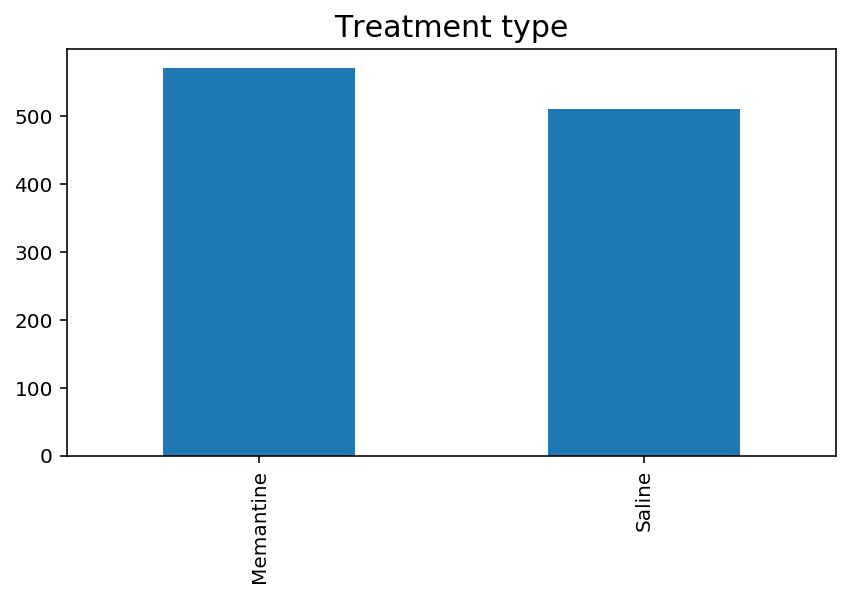

In [98]:
#Number of Memantine and Saline variables present in the dataset
plotgraph = data_p['Treatment'].value_counts().plot(kind = 'bar')
plt.tight_layout()
plt.title('Treatment type', fontsize = 15)
plt.show();

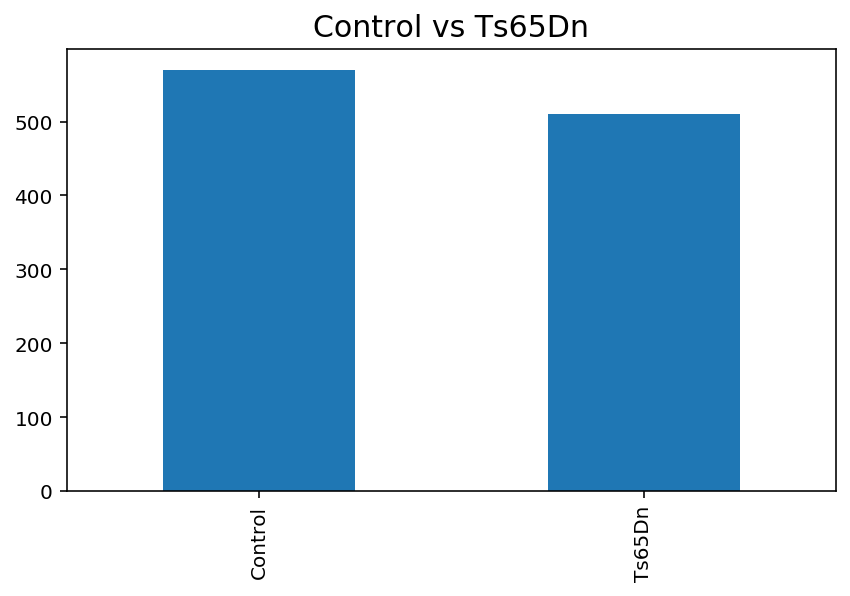

In [99]:
#Number of control vs non-control data present in the column
plotgraph = data_p['Genotype'].value_counts().plot(kind = 'bar')
plt.tight_layout()
plt.title('Control vs Ts65Dn', fontsize = 15)
plt.show();

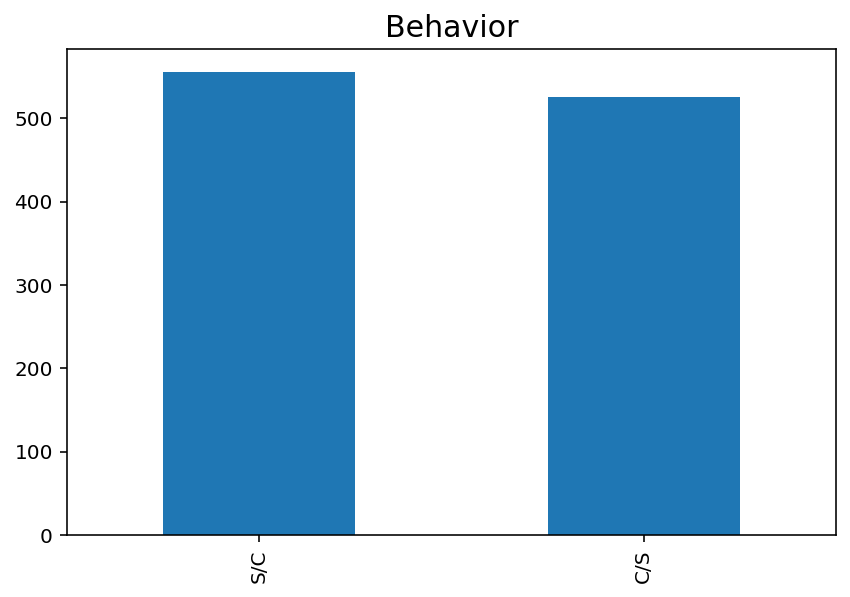

In [100]:
#Number of Memantine and Saline variables present in the dataset
plotgraph = data_p['Behavior'].value_counts().plot(kind = 'bar')
plt.tight_layout()
plt.title('Behavior', fontsize = 15)
plt.show();

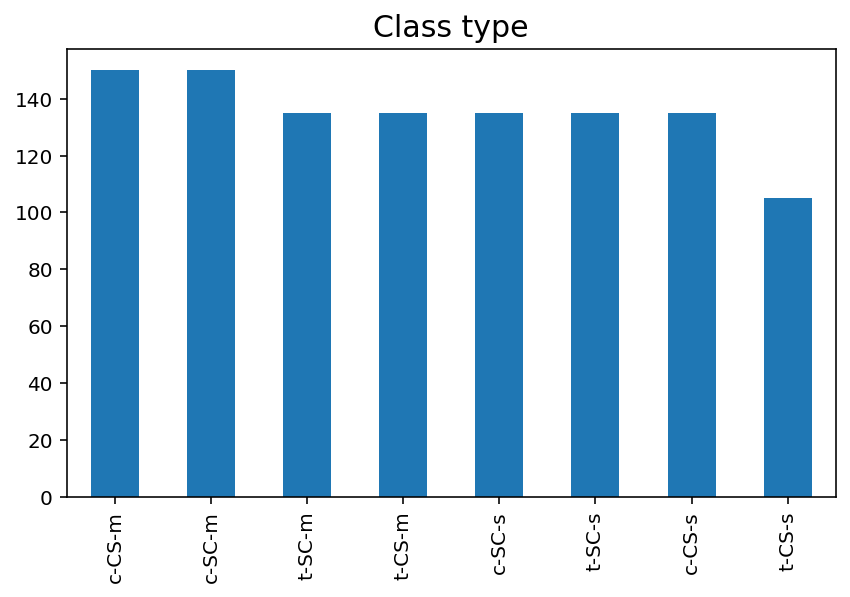

In [101]:
#Number of Memantine and Saline variables present in the dataset
plotgraph = data_p['class'].value_counts().plot(kind = 'bar')
plt.tight_layout()
plt.title('Class type', fontsize = 15)
plt.show();

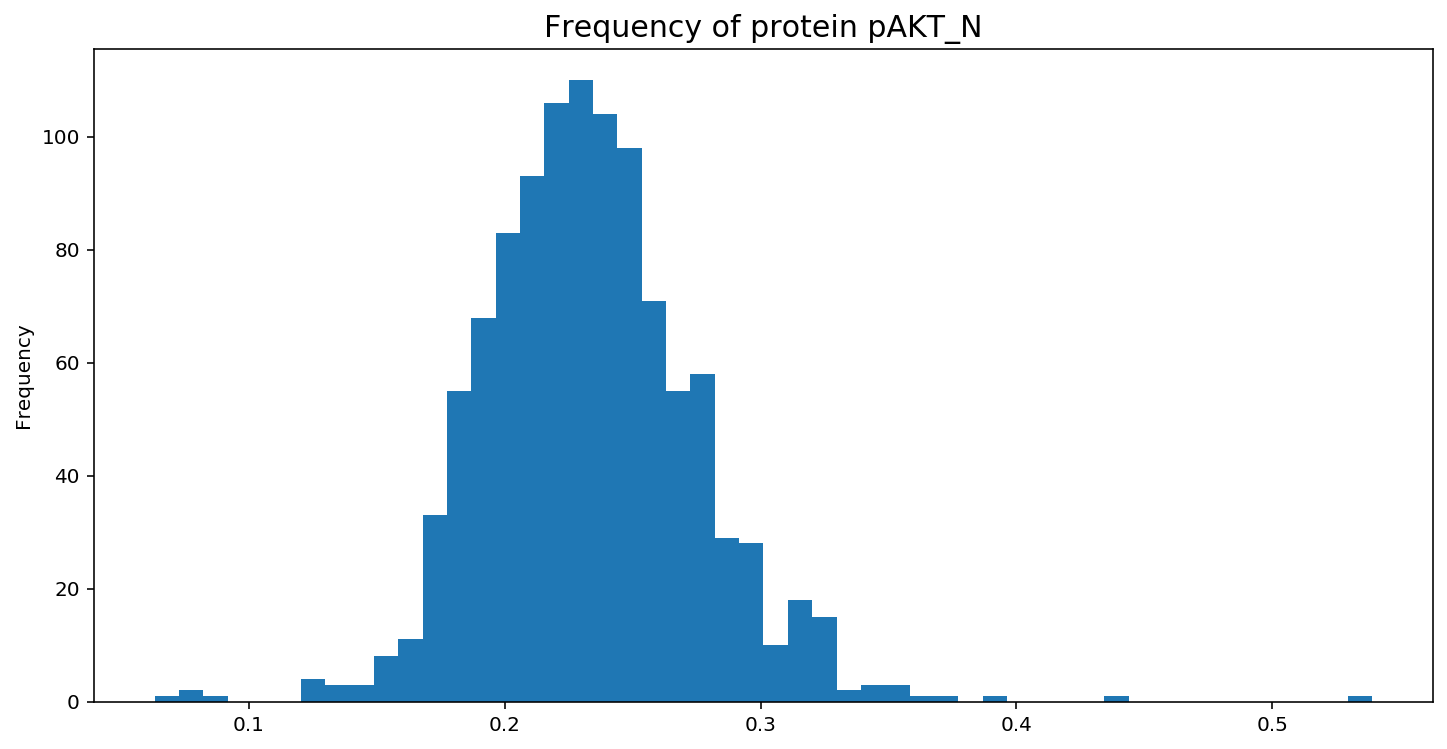

In [102]:
plotgraph = data_p['pAKT_N'].plot(kind='hist',bins=50, figsize=(12,6))
plt.title('Frequency of protein pAKT_N', fontsize =15)
plt.show();

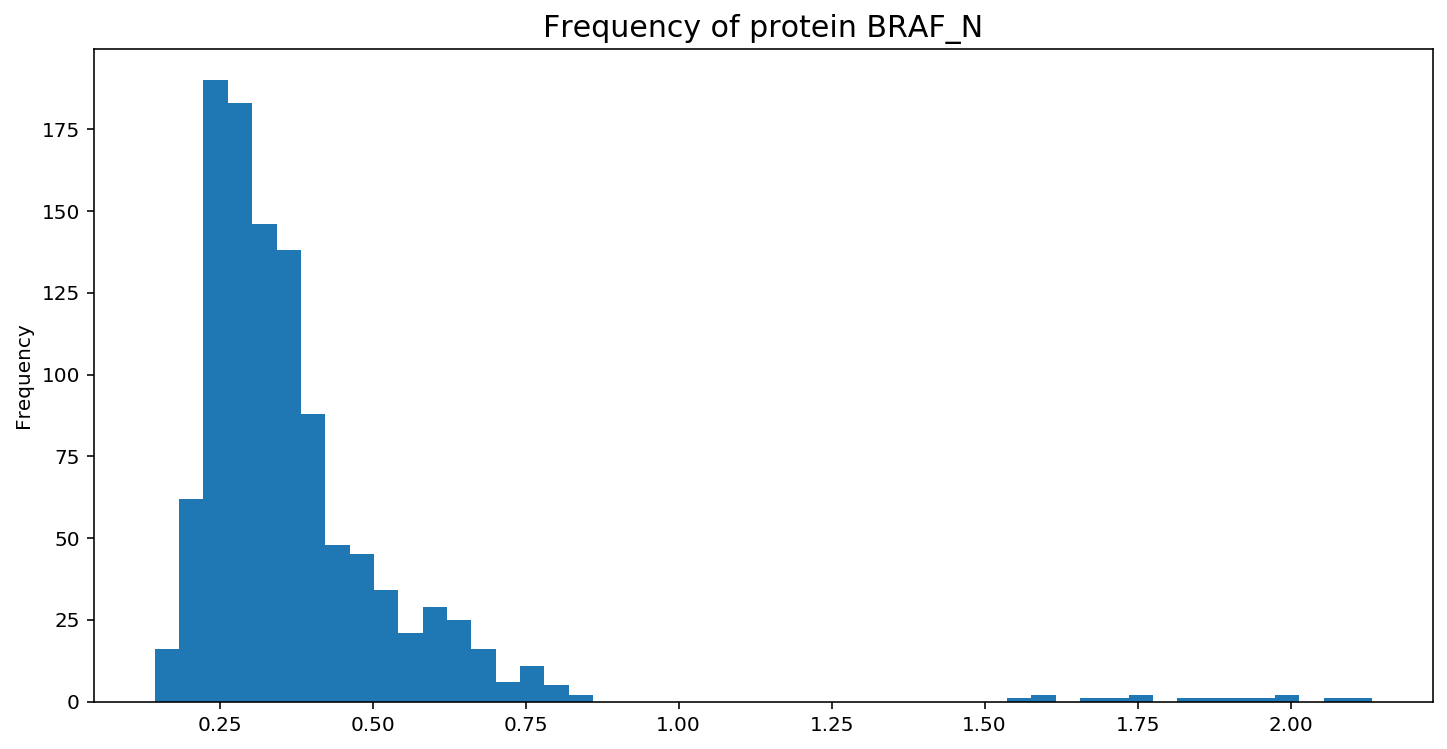

In [103]:
plotgraph = data_p['BRAF_N'].plot(kind='hist',bins=50, figsize=(12,6))
plt.title('Frequency of protein BRAF_N', fontsize =15)
plt.show();

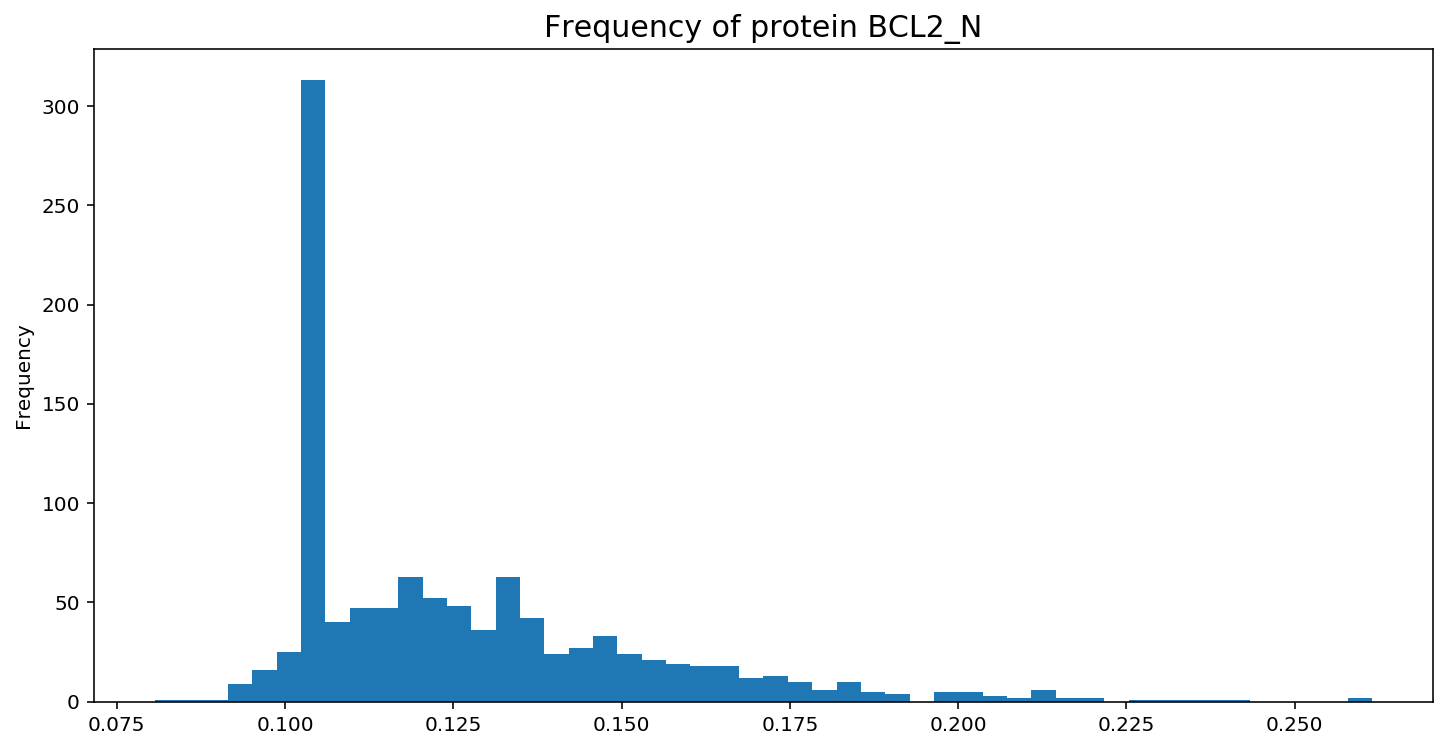

In [104]:
#Amount of BCL2_N 
plotgraph = data_p['BCL2_N'].plot(kind='hist',bins=50, figsize=(12,6))
plt.title('Frequency of protein BCL2_N', fontsize =15)
plt.show();

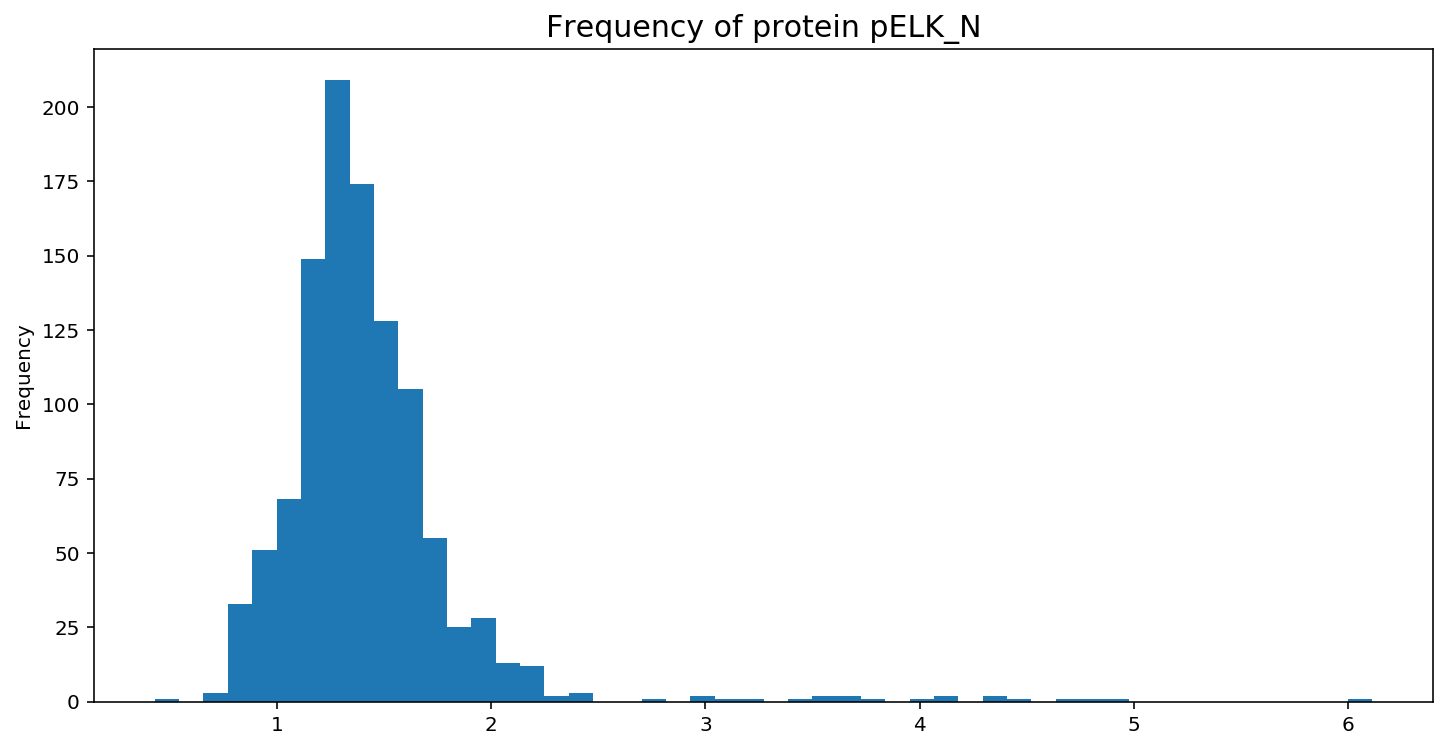

In [105]:
plotgraph = data_p['pELK_N'].plot(kind='hist',bins=50, figsize=(12,6))
plt.title('Frequency of protein pELK_N', fontsize =15)
plt.show();

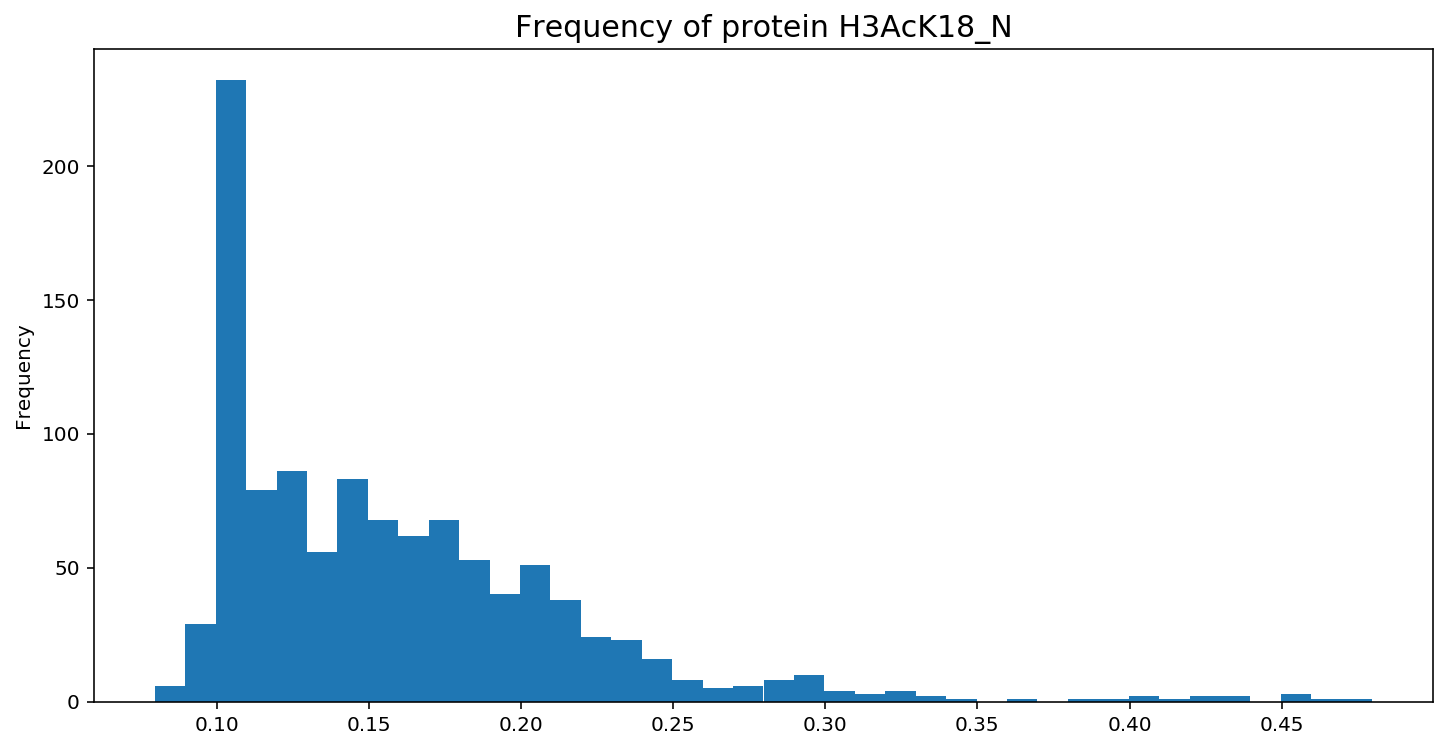

In [106]:
plotgraph = data_p['H3AcK18_N'].plot(kind='hist',bins=40, figsize=(12,6))
plt.title('Frequency of protein H3AcK18_N', fontsize =15)
plt.show();

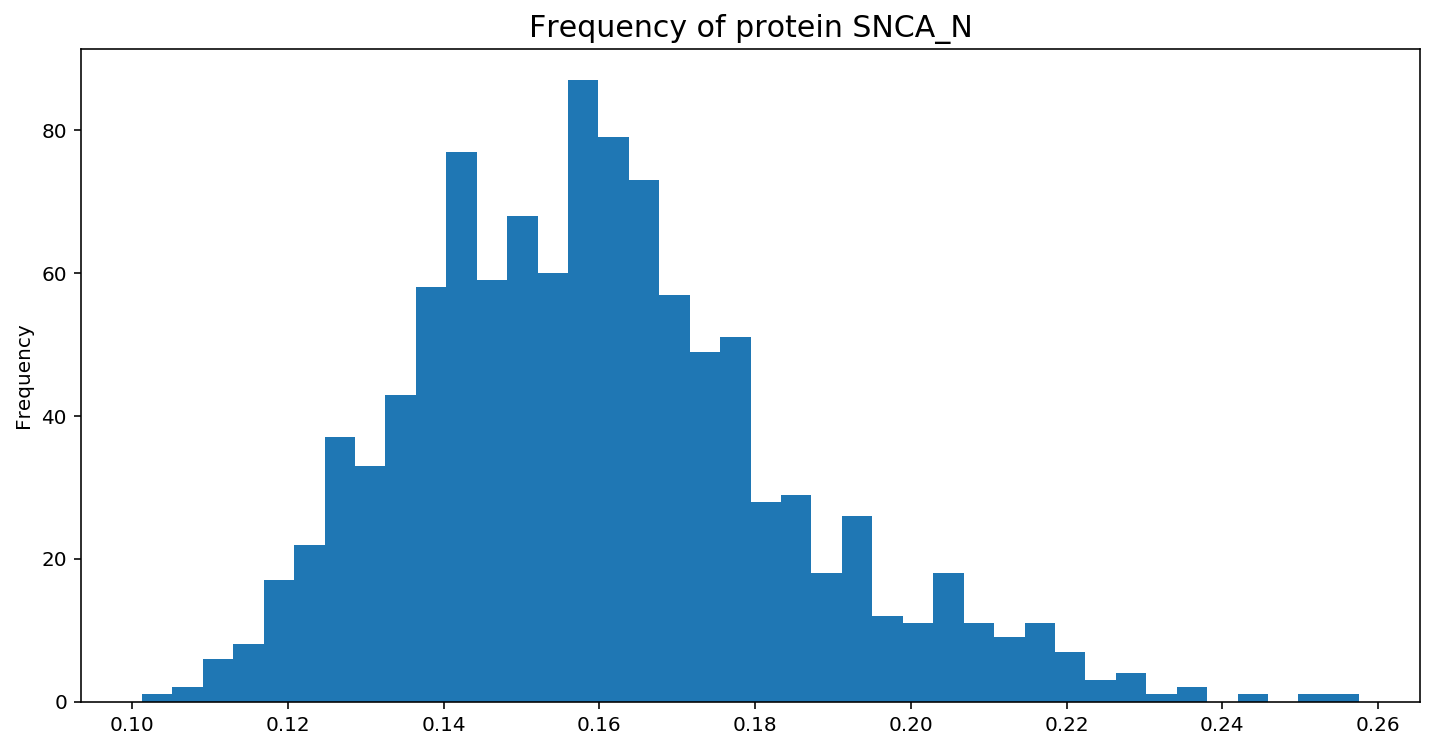

In [107]:
plotgraph = data_p['SNCA_N'].plot(kind='hist',bins=40, figsize=(12,6))
plt.title('Frequency of protein SNCA_N', fontsize =15)
plt.show();

# Relationships between Columns

We are exploring the relationship between classes and amount of protein given to the mice
Hypothesis: If the protein helps mice to learn stimulate shock or context shock .  


We are exploring the relationship between class and amount of SNCA_N



Hypothesis = Mice which are stimulated to learn will have more protein present than others, as it is assumed that SNCA_N proteins help learn stimulate context shock.

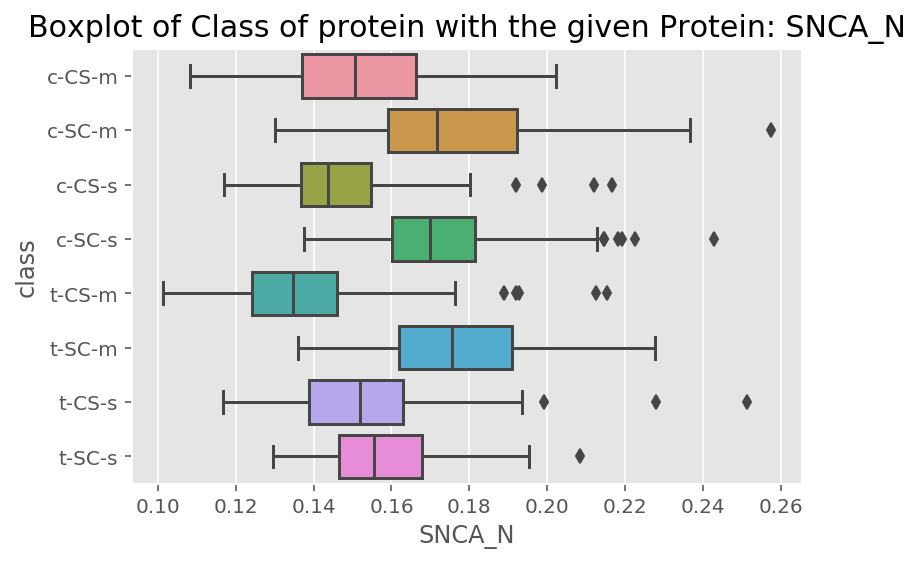

In [108]:
plt.style.use("ggplot")
sns.boxplot(data_p['SNCA_N'], data_p['class']);
plt.title("Boxplot of Class of protein with the given Protein: SNCA_N", fontsize = 15)
plt.show();

c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)
t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

The hypothesis is proven wrong, as we can see mice stimulating to learn has lower than the one not stimulated to learn. The median of protein present in the mice c-CS-s (Stimulated to learn) is lower than a mice c-SC-s (not stimulated to learn), and for c-CS-m (stimulated to learn), median of protein present is lower than c-SC-m (not stimulated to learn). Hence, its the same case for non-control mice (more protein present for not stimulated to learn. According to this hypothesis, we can say less SNCA_N protein present inside a mice is more stimulated to learn context shock.

Hypothesis = Mice which are stimulated to learn will have more protein present than others, as it is assumed that pELK_N proteins help learn stimulate context shock.

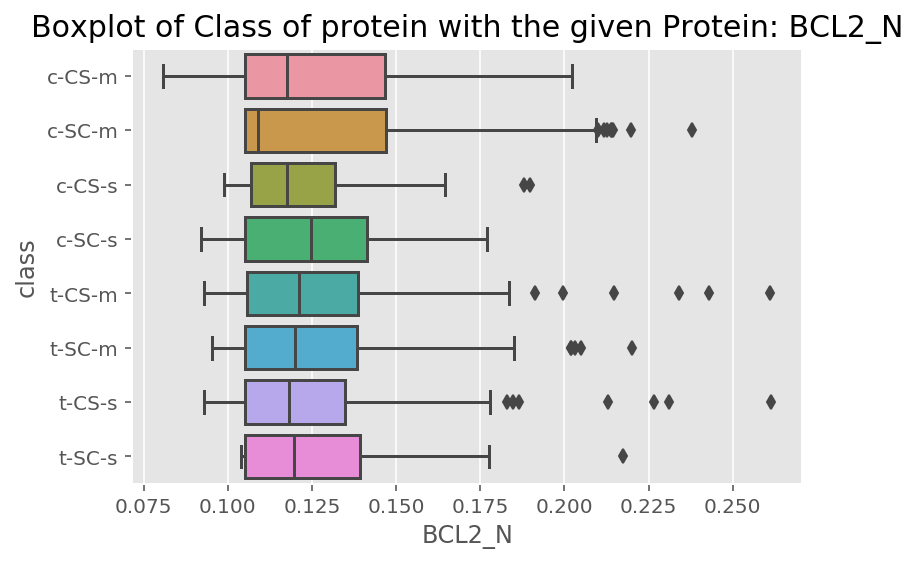

In [109]:
plt.style.use("ggplot")
sns.boxplot(data_p['BCL2_N'], data_p['class']);
plt.title("Boxplot of Class of protein with the given Protein: BCL2_N", fontsize = 15)
plt.show();

c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)
t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

The hypothesis is proven wrong, as we can see mice stimulating to learn has lower median and spread than the one not stimulated to learn. The median of protein present in the mice c-CS-s (Stimulated to learn) is lower than a mice c-SC-s (not stimulated to learn), and for c-CS-m (stimulated to learn), median of protein present is more than c-SC-m (not stimulated to learn). Hence, its the same case for non-control mice (lower protein present for not stimulated to learn. According to this hypothesis, we can say less BCL2_N protein present inside a mice is more stimulated to learn context shock.

Hypothesis = Mice which are stimulated to learn will have more protein present than others, as it is assumed that BRAF_N proteins help learn stimulate context shock.

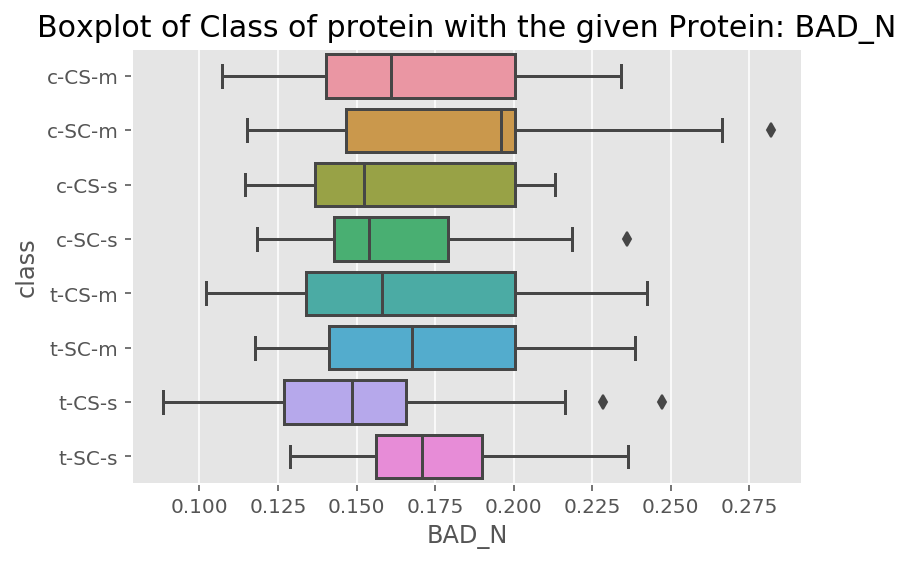

In [110]:
plt.style.use("ggplot")
sns.boxplot(data_p['BAD_N'], data_p['class']);
plt.title("Boxplot of Class of protein with the given Protein: BAD_N", fontsize = 15)
plt.show();

c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)
t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

The hypothesis is proven wrong, as we can see mice stimulating to learn has lower median and spread than the one not stimulated to learn. The median of protein present in the mice c-CS-s (Stimulated to learn) is lower than a mice c-SC-s (not stimulated to learn), and for c-CS-m (stimulated to learn), median of protein present is more than c-SC-m (not stimulated to learn). Hence, its the same case for non-control mice (lower protein present for not stimulated to learn. According to this hypothesis, we can say less BAD_N protein present inside a mice is more stimulated to learn context shock.

Hypothesis = Mice which are stimulated to learn will have more protein present than others, as it is assumed that SHH_N proteins help learn stimulate context shock.

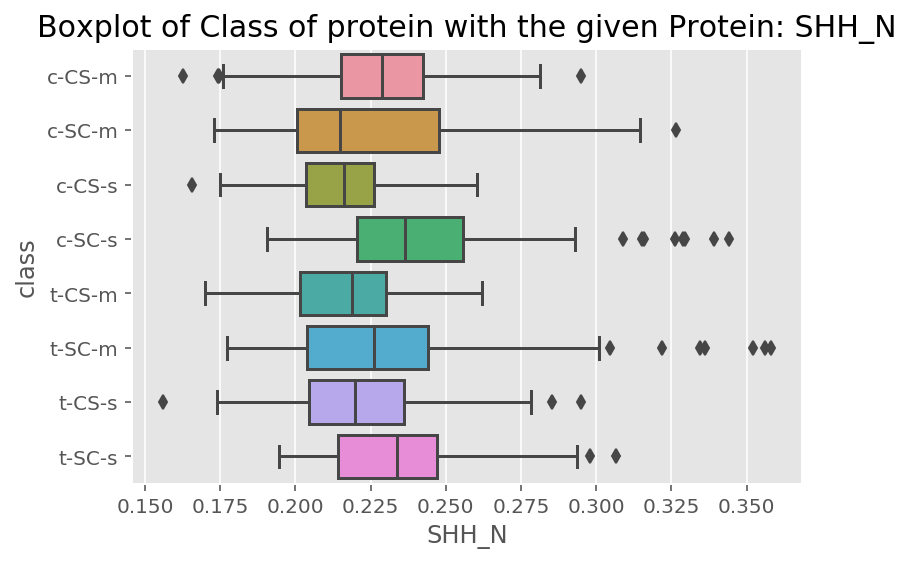

In [111]:
plt.style.use("ggplot")
sns.boxplot(data_p['SHH_N'], data_p['class']);
plt.title("Boxplot of Class of protein with the given Protein: SHH_N", fontsize = 15)
plt.show();

c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)
t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

The hypothesis is proven wrong, as we can see mice stimulating to learn has lower median and spread than the one not stimulated to learn. The median of protein present in the mice t-CS-s (Stimulated to learn) is lower than a mice t-SC-s (not stimulated to learn), and for t-CS-s (stimulated to learn), median of protein present is more than t-SC-m (not stimulated to learn). Hence, its the same case for control mice (lower protein present for not stimulated to learn. According to this hypothesis, we can say less SHH_N protein present inside a mice is more stimulated to learn context shock.

Hypothesis = Mice which are stimulated to learn will have more protein present than others, as it is assumed that SHH_N proteins help learn stimulate context shock.

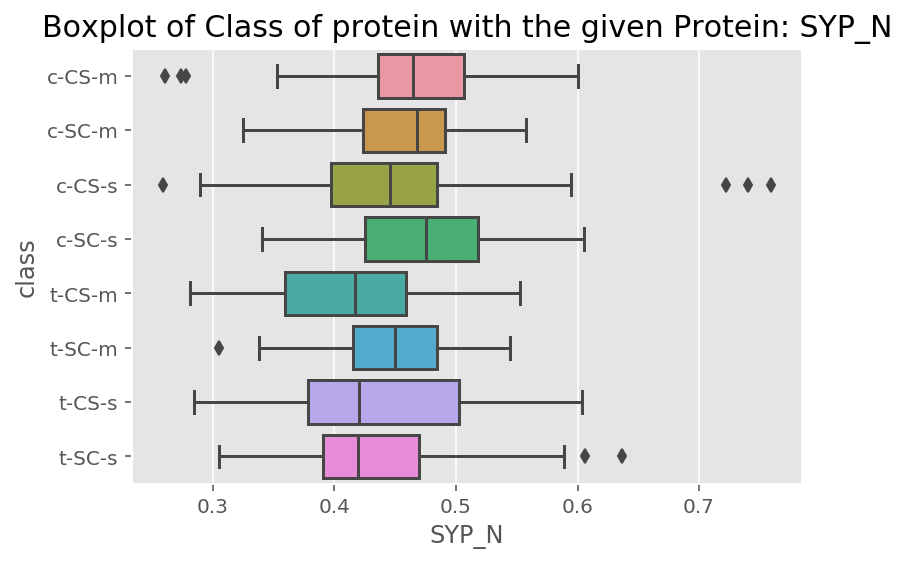

In [112]:
# We are exploring the relationship between class and amount of SNCA_N
plt.style.use("ggplot")
sns.boxplot(data_p['SYP_N'], data_p['class']);
plt.title("Boxplot of Class of protein with the given Protein: SYP_N", fontsize = 15)
plt.show();

The hypothesis is proven right, as we can see mice stimulating to learn has more median and spread than the one not stimulated to learn. The median and spread of protein present in the mice c-CS-s (Stimulated to learn) is more than a mice c-SC-s (not stimulated to learn), and for c-CS-s (stimulated to learn), median of protein present is more than c-SC-m (not stimulated to learn). Hence, its the same case for control mice (less protein present for not stimulated to learn. According to this hypothesis, we can say more SYP_N protein present inside a mice is more stimulated to learn context shock.

Hypothesis = Mice which are stimulated to learn will have more protein present than others, as it is assumed that GFAP_N proteins help learn stimulate context shock.

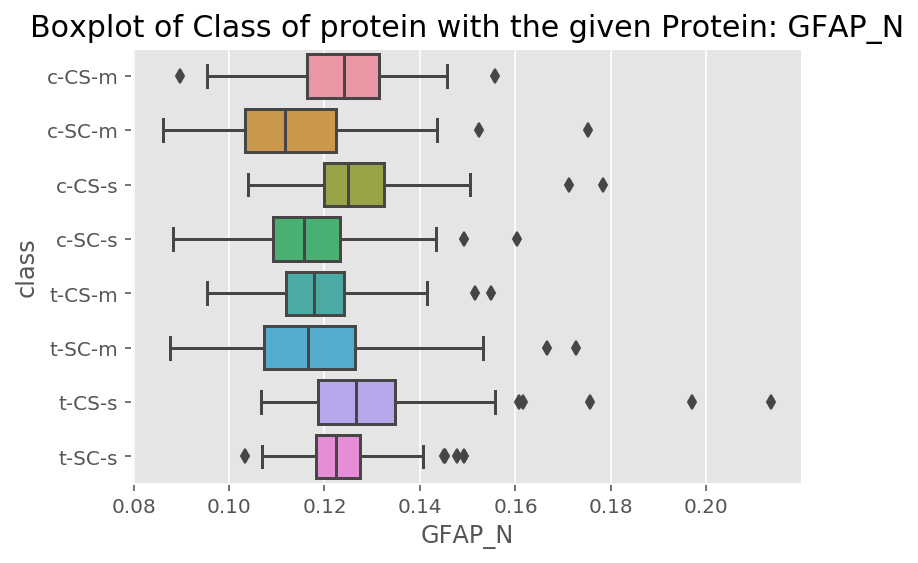

In [113]:
# We are exploring the relationship between class and amount of SNCA_N
plt.style.use("ggplot")
sns.boxplot(data_p['GFAP_N'], data_p['class']);
plt.title("Boxplot of Class of protein with the given Protein: GFAP_N", fontsize = 15)
plt.show();

The hypothesis is proven right, as we can see mice stimulating to learn has more median and spread than the one not stimulated to learn. The median and spread of protein present in the mice c-CS-s (Stimulated to learn) is more than a mice c-SC-s (not stimulated to learn), and for c-CS-s (stimulated to learn), median of protein present is more than c-SC-m (not stimulated to learn). Hence, its the same case for control mice (less protein present for not stimulated to learn. According to this hypothesis, we can say more GFAP_N protein present inside a mice is more stimulated to learn context shock.

Hypothesis = Mice which are stimulated to learn will have more protein present than others, as it is assumed that AKT_N proteins help learn stimulate context shock.

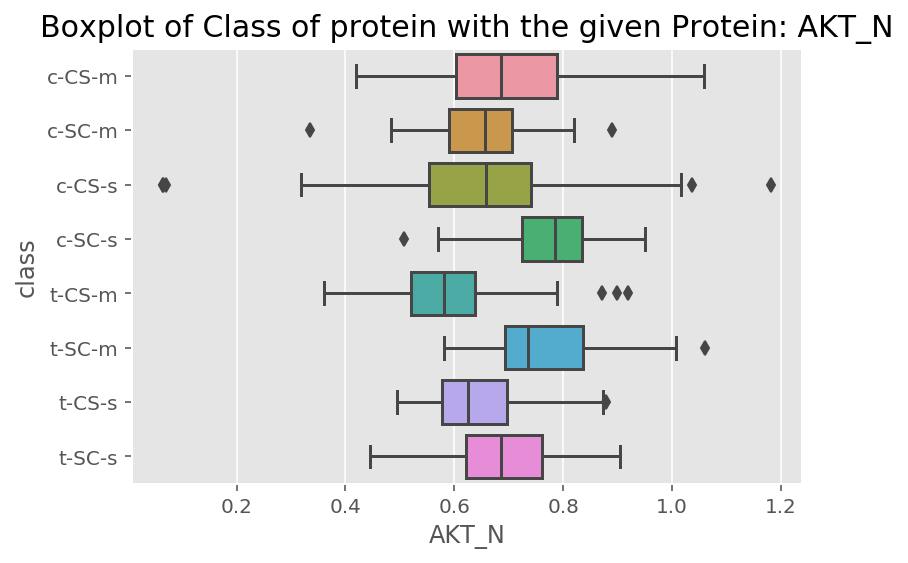

In [114]:
# We are exploring the relationship between class and amount of SNCA_N
plt.style.use("ggplot")
sns.boxplot(data_p['AKT_N'], data_p['class']);
plt.title("Boxplot of Class of protein with the given Protein: AKT_N", fontsize = 15)
plt.show();

The hypothesis is proven right, as we can see mice stimulating to learn has more median and spread than the one not stimulated to learn. The median and spread for c-CS-m (stimulated to learn), median of protein present is more than c-SC-m (not stimulated to learn). Hence, its the same case for control mice (less protein present for not stimulated to learn. According to this hypothesis, we can say more AKT_N protein present inside a mice is more stimulated to learn context shock.

Hypothesis = Mice which are stimulated to learn will have more protein present than others, as it is assumed that ELK_N proteins help learn stimulate context shock.

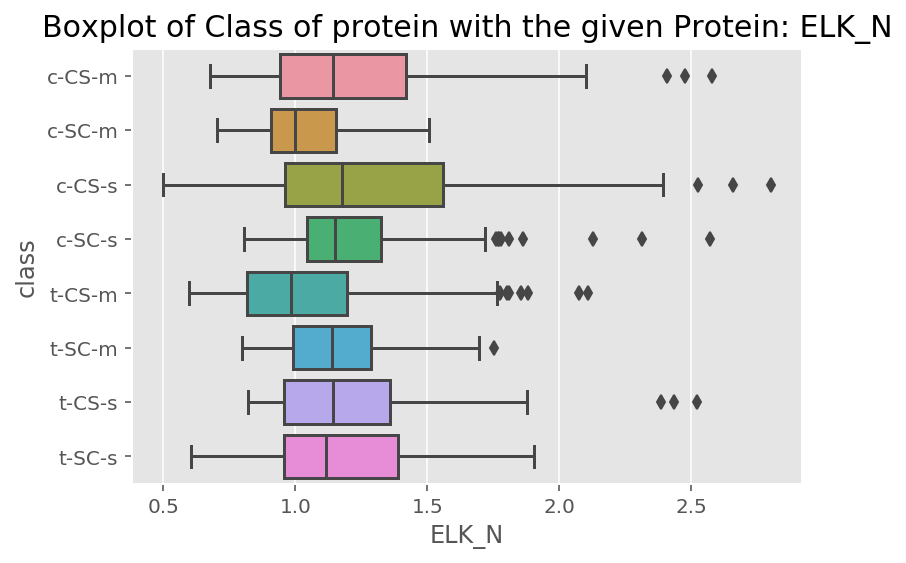

In [115]:
# We are exploring the relationship between class and amount of SNCA_N
plt.style.use("ggplot")
sns.boxplot(data_p['ELK_N'], data_p['class']);
plt.title("Boxplot of Class of protein with the given Protein: ELK_N", fontsize = 15)
plt.show();

The hypothesis is nor right nor wrong, as we can see mice stimulating to learn has more median and spread than the one not stimulated to learn in some cases, and its less in some cases. The median and spread for c-CS-m (stimulated to learn), median of protein present is more than c-SC-m (not stimulated to learn). Hence, its a differetn case for control mice (more protein present for not stimulated to learn. According to this hypothesis, we can say more ELK_N protein present inside a mice is maybe more stimulated to learn context shock.

Hypothesis = Mice which are stimulated to learn will have more protein present than others, as it is assumed that ERK_N proteins help learn stimulate context shock.

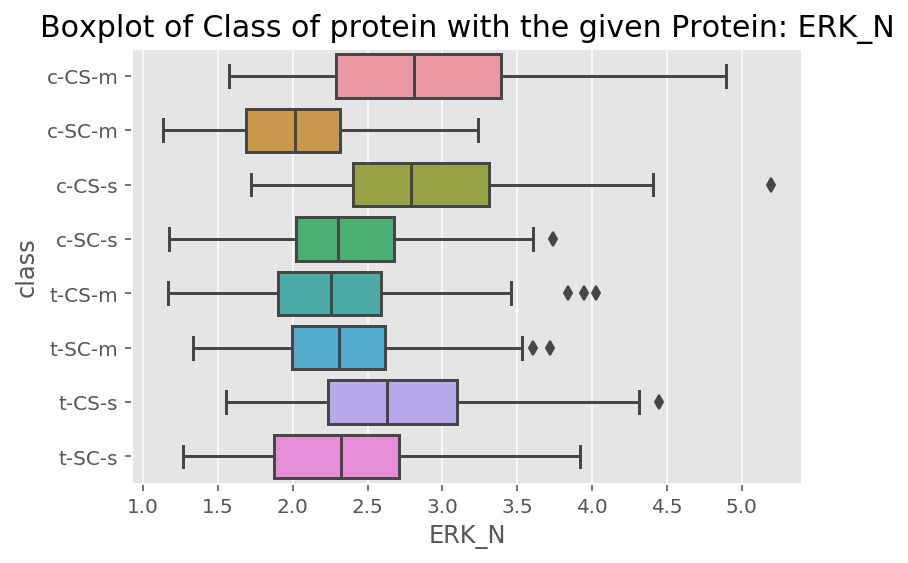

In [116]:
# We are exploring the relationship between class and amount of SNCA_N
plt.style.use("ggplot")
sns.boxplot(data_p['ERK_N'], data_p['class']);
plt.title("Boxplot of Class of protein with the given Protein: ERK_N", fontsize = 15)
plt.show();

The hypothesis is proven right, as we can see mice stimulating to learn has more median and spread than the one not stimulated to learn. The median and spread for c-CS-m (stimulated to learn), median of protein present is more than c-SC-m (not stimulated to learn). Hence, its the same case for control mice (less protein present for not stimulated to learn. According to this hypothesis, we can say more ERK_N protein present inside a mice is more stimulated to learn context shock.

Hypothesis = Mice which are stimulated to learn will have more protein present than others, as it is assumed that MEK_N proteins help learn stimulate context shock.

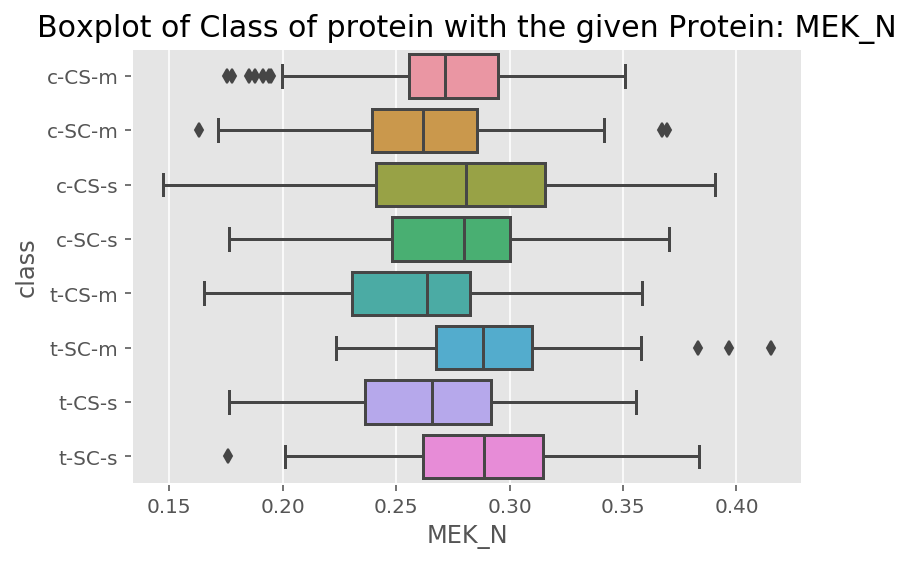

In [117]:
# We are exploring the relationship between class and amount of SNCA_N
plt.style.use("ggplot")
sns.boxplot(data_p['MEK_N'], data_p['class']);
plt.title("Boxplot of Class of protein with the given Protein: MEK_N", fontsize = 15)
plt.show();

The hypothesis is nor right nor wrong, as we can see mice stimulating to learn has more median and spread than the one not stimulated to learn in some cases, and its less in some cases. The median and spread for c-CS-m (stimulated to learn), median of protein present is more than c-SC-m (not stimulated to learn). Hence, its a differetn case for control mice (more protein present for not stimulated to learn. According to this hypothesis, we can say more MEK_N protein present inside a mice is maybe more stimulated to learn context shock.

# Data Model 1 

In [118]:
modeldata = pd.read_csv('Data_Cortex_Nuclear.csv')
type(modeldata)

pandas.core.frame.DataFrame

In [119]:
modeldata.describe(include=np.object)
#There are four attributes in the dataset, and that will be our target columns.

,MouseID,Genotype,Treatment,Behavior,class
count,1080,1080,1080,1080,1080
unique,1080,2,2,2,8
top,50810A_10,Control,Memantine,S/C,c-CS-m
freq,1,570,570,555,150


In [120]:
modeldata.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [121]:
modeldata.all

<bound method DataFrame.all of        MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
5        309_6  0.447506  0.628176  0.367388  2.385939  4.807635  0.218578   
6        309_7  0.428033  0.573696  0.342709  2.334224  4.473130  0.225173   
7        309_8  0.416923  0.564036  0.327703  2.260135  4.268735  0.214834   
8        309_9  0.386311  0.538428  0.317720  2.125725  4.063950  0.207222   
9       309_10  0.380827  0.499294  0.362462  2.096266  3.598587  0.227649   
10      309_11  0.366511  0.513278  0.327792  2.072572  3.661058  0.229475   
11      309_12  0.364154  0.49941

In [122]:
pd.read_csv('Data_Cortex_Nuclear.csv')

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
5,309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m
6,309_7,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,...,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,Control,Memantine,C/S,c-CS-m
7,309_8,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,...,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,Control,Memantine,C/S,c-CS-m
8,309_9,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,...,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599,Control,Memantine,C/S,c-CS-m
9,309_10,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,...,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862,Control,Memantine,C/S,c-CS-m


In [123]:
modeldata.shape

(1080, 82)

In [124]:
#Printing feature names
for col in modeldata.columns: 
    print(col)

MouseID
DYRK1A_N
ITSN1_N
BDNF_N
NR1_N
NR2A_N
pAKT_N
pBRAF_N
pCAMKII_N
pCREB_N
pELK_N
pERK_N
pJNK_N
PKCA_N
pMEK_N
pNR1_N
pNR2A_N
pNR2B_N
pPKCAB_N
pRSK_N
AKT_N
BRAF_N
CAMKII_N
CREB_N
ELK_N
ERK_N
GSK3B_N
JNK_N
MEK_N
TRKA_N
RSK_N
APP_N
Bcatenin_N
SOD1_N
MTOR_N
P38_N
pMTOR_N
DSCR1_N
AMPKA_N
NR2B_N
pNUMB_N
RAPTOR_N
TIAM1_N
pP70S6_N
NUMB_N
P70S6_N
pGSK3B_N
pPKCG_N
CDK5_N
S6_N
ADARB1_N
AcetylH3K9_N
RRP1_N
BAX_N
ARC_N
ERBB4_N
nNOS_N
Tau_N
GFAP_N
GluR3_N
GluR4_N
IL1B_N
P3525_N
pCASP9_N
PSD95_N
SNCA_N
Ubiquitin_N
pGSK3B_Tyr216_N
SHH_N
BAD_N
BCL2_N
pS6_N
pCFOS_N
SYP_N
H3AcK18_N
EGR1_N
H3MeK4_N
CaNA_N
Genotype
Treatment
Behavior
class


In [125]:
print(modeldata.to_string())


        MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N    pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N    TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N   pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N     Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N   PSD95_N    SNCA_N  Ubiquitin_N  pGSK3B_Tyr216_N     SHH_N     BAD_N    BCL2_N     pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N Genotype  Treatment Behavior   class
0         309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698  0.296927  1

Now Feature Enginering will be done, according to the new cleaned dataset.

In [126]:
from sklearn.model_selection import train_test_split
data_p.drop('MouseID',axis=1,inplace=True)
y = data_p['class']
X = data_p.iloc[:,:77].values

Training the dataset

In [127]:
 X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [128]:
X_train

array([[0.28002414, 0.46907061, 0.27881714, ..., 0.19291249, 0.20761167,
        1.90166363],
       [0.35969917, 0.49040456, 0.32520747, ..., 0.26757812, 0.25244141,
        1.12776693],
       [0.23782051, 0.37179487, 0.34209402, ..., 0.22292207, 0.22353958,
        1.07681857],
       ...,
       [0.39042664, 0.58418314, 0.28491155, ..., 0.20146652, 0.17405938,
        0.96333694],
       [0.24244452, 0.37872198, 0.34961526, ..., 0.17444906, 0.18300862,
        1.2772916 ],
       [0.41222096, 0.57548241, 0.33598184, ..., 0.18622754, 0.21461078,
        1.87844311]])

In [129]:
X_train.shape

(648, 77)

In [130]:
y_train

402     c-CS-s
161     c-SC-m
568     c-SC-s
177     c-SC-m
948     t-SC-s
737     t-SC-m
424     c-CS-s
325     c-CS-s
1011    t-SC-s
871     t-CS-s
350     c-CS-s
447     c-SC-s
17      c-CS-m
1075    t-SC-s
186     c-SC-m
1078    t-SC-s
338     c-CS-s
206     c-SC-m
521     c-SC-s
980     t-SC-s
345     c-CS-s
313     c-CS-s
242     c-SC-m
520     c-SC-s
451     c-SC-s
170     c-SC-m
187     c-SC-m
1013    t-SC-s
133     c-CS-m
301     c-CS-s
         ...  
697     t-CS-m
423     c-CS-s
910     t-CS-s
659     t-CS-m
797     t-SC-m
1059    t-SC-s
99      c-CS-m
850     t-CS-s
448     c-SC-s
755     t-SC-m
976     t-SC-s
115     c-CS-m
777     t-SC-m
72      c-CS-m
845     t-CS-s
537     c-SC-s
849     t-CS-s
174     c-SC-m
87      c-CS-m
551     c-SC-s
705     t-SC-m
314     c-CS-s
600     t-CS-m
599     t-CS-m
277     c-SC-m
1033    t-SC-s
763     t-SC-m
835     t-SC-m
559     c-SC-s
684     t-CS-m
Name: class, Length: 648, dtype: object

In [131]:
y_train.shape

(648,)

In [132]:
X_test

array([[0.58123338, 0.80536913, 0.29530201, ..., 0.14630568, 0.13010136,
        1.47612697],
       [0.62763437, 0.78077067, 0.33171218, ..., 0.17126462, 0.20495843,
        1.80004414],
       [0.77438359, 1.0468034 , 0.35369845, ..., 0.14240682, 0.17250757,
        1.65510847],
       ...,
       [0.71342551, 0.80530776, 0.26583408, ..., 0.17403066, 0.23642922,
        1.52479711],
       [0.30676003, 0.46323727, 0.30918395, ..., 0.22900215, 0.21511099,
        0.70177159],
       [0.78433598, 0.90011351, 0.36123723, ..., 0.1462705 , 0.16090637,
        2.00167519]])

In [133]:
X_test.shape

(432, 77)

In [134]:
from sklearn.neighbors import KNeighborsClassifier
# Begin by importing all necessary libraries
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Using K-Neighbors Classifier

In [135]:

KNN_model = KNeighborsClassifier(n_neighbors=5)

In [136]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [137]:
KNN_prediction = KNN_model.predict(X_test)

In [138]:
#test set prediction
print(KNN_prediction)

['t-CS-s' 't-CS-s' 't-CS-m' 'c-SC-s' 'c-CS-m' 't-SC-s' 't-SC-s' 'c-SC-m'
 'c-SC-s' 'c-SC-s' 't-CS-s' 't-CS-m' 'c-SC-s' 'c-SC-s' 't-CS-m' 'c-SC-s'
 'c-CS-s' 'c-SC-s' 'c-SC-s' 'c-SC-s' 't-CS-s' 'c-SC-m' 'c-SC-m' 't-SC-m'
 'c-CS-m' 'c-CS-m' 't-SC-m' 'c-CS-s' 't-SC-m' 't-CS-s' 'c-SC-m' 't-SC-s'
 'c-SC-m' 't-CS-m' 't-CS-s' 't-CS-m' 'c-CS-m' 'c-CS-m' 'c-SC-m' 'c-SC-s'
 'c-CS-m' 't-CS-s' 'c-CS-m' 'c-SC-m' 'c-SC-m' 't-CS-s' 't-CS-m' 't-SC-m'
 't-CS-m' 't-SC-m' 't-CS-m' 'c-CS-m' 'c-SC-s' 'c-SC-s' 'c-CS-m' 'c-CS-m'
 'c-CS-m' 'c-CS-m' 'c-SC-s' 'c-SC-s' 'c-SC-m' 'c-SC-m' 'c-CS-s' 't-SC-m'
 'c-SC-m' 't-CS-s' 'c-SC-m' 'c-CS-s' 'c-CS-m' 'c-SC-m' 't-SC-s' 'c-CS-m'
 'c-CS-m' 't-CS-s' 'c-CS-m' 'c-CS-s' 'c-SC-m' 'c-CS-s' 't-SC-m' 'c-SC-s'
 't-SC-s' 't-SC-m' 't-SC-s' 'c-CS-m' 't-CS-m' 't-SC-s' 't-SC-s' 't-CS-s'
 'c-CS-s' 'c-SC-s' 't-CS-m' 'c-SC-m' 't-SC-s' 't-SC-m' 't-CS-m' 't-CS-m'
 't-SC-m' 'c-CS-s' 'c-CS-m' 'c-SC-s' 'c-CS-m' 't-CS-m' 't-CS-m' 'c-CS-s'
 't-SC-m' 'c-CS-m' 'c-CS-m' 't-CS-s' 'c-SC-m' 'c-SC

In [139]:
print('Accuracy Score: ',accuracy_score(y_test, KNN_prediction)*100)

Accuracy Score:  88.19444444444444


In [140]:
print(classification_report(KNN_prediction, y_test))

              precision    recall  f1-score   support

      c-CS-m       0.98      0.74      0.84        77
      c-CS-s       0.79      0.95      0.87        44
      c-SC-m       0.95      0.84      0.89        70
      c-SC-s       0.93      0.95      0.94        57
      t-CS-m       0.81      0.94      0.87        51
      t-CS-s       0.84      0.88      0.86        41
      t-SC-m       0.87      0.87      0.87        46
      t-SC-s       0.85      0.98      0.91        46

    accuracy                           0.88       432
   macro avg       0.88      0.89      0.88       432
weighted avg       0.89      0.88      0.88       432



In [141]:
y_pre = KNN_model.predict(X_test)
y_pre

array(['t-CS-s', 't-CS-s', 't-CS-m', 'c-SC-s', 'c-CS-m', 't-SC-s',
       't-SC-s', 'c-SC-m', 'c-SC-s', 'c-SC-s', 't-CS-s', 't-CS-m',
       'c-SC-s', 'c-SC-s', 't-CS-m', 'c-SC-s', 'c-CS-s', 'c-SC-s',
       'c-SC-s', 'c-SC-s', 't-CS-s', 'c-SC-m', 'c-SC-m', 't-SC-m',
       'c-CS-m', 'c-CS-m', 't-SC-m', 'c-CS-s', 't-SC-m', 't-CS-s',
       'c-SC-m', 't-SC-s', 'c-SC-m', 't-CS-m', 't-CS-s', 't-CS-m',
       'c-CS-m', 'c-CS-m', 'c-SC-m', 'c-SC-s', 'c-CS-m', 't-CS-s',
       'c-CS-m', 'c-SC-m', 'c-SC-m', 't-CS-s', 't-CS-m', 't-SC-m',
       't-CS-m', 't-SC-m', 't-CS-m', 'c-CS-m', 'c-SC-s', 'c-SC-s',
       'c-CS-m', 'c-CS-m', 'c-CS-m', 'c-CS-m', 'c-SC-s', 'c-SC-s',
       'c-SC-m', 'c-SC-m', 'c-CS-s', 't-SC-m', 'c-SC-m', 't-CS-s',
       'c-SC-m', 'c-CS-s', 'c-CS-m', 'c-SC-m', 't-SC-s', 'c-CS-m',
       'c-CS-m', 't-CS-s', 'c-CS-m', 'c-CS-s', 'c-SC-m', 'c-CS-s',
       't-SC-m', 'c-SC-s', 't-SC-s', 't-SC-m', 't-SC-s', 'c-CS-m',
       't-CS-m', 't-SC-s', 't-SC-s', 't-CS-s', 'c-CS-s', 'c-SC

In [142]:
y_pre.shape

(432,)

In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[57  0  0  0  1  0  0  0]
 [ 7 42  0  0  0  4  0  0]
 [ 0  0 59  2  0  0  1  0]
 [ 0  0  0 54  0  0  4  0]
 [ 8  1  0  0 48  1  0  1]
 [ 4  1  0  0  2 36  0  0]
 [ 0  0  6  0  0  0 40  0]
 [ 1  0  5  1  0  0  1 45]]


In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.74      0.98      0.84        58
      c-CS-s       0.95      0.79      0.87        53
      c-SC-m       0.84      0.95      0.89        62
      c-SC-s       0.95      0.93      0.94        58
      t-CS-m       0.94      0.81      0.87        59
      t-CS-s       0.88      0.84      0.86        43
      t-SC-m       0.87      0.87      0.87        46
      t-SC-s       0.98      0.85      0.91        53

    accuracy                           0.88       432
   macro avg       0.89      0.88      0.88       432
weighted avg       0.89      0.88      0.88       432



Using Parameter Tuning to increase the accuracy score.

In [145]:
#trying for improved results
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(5, weights='distance')
fit = clf.fit(X_train, y_train)

y_pre = fit.predict(X_test)


In [146]:
print('Accuracy Score after adding weights parameter: ', accuracy_score(y_pre, y_test)*100)

Accuracy Score after adding weights parameter:  93.98148148148148


In [147]:
cm = confusion_matrix(y_test, y_pre)

print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.82      1.00      0.90        58
      c-CS-s       1.00      0.83      0.91        53
      c-SC-m       0.94      0.95      0.94        62
      c-SC-s       0.97      0.97      0.97        58
      t-CS-m       1.00      0.88      0.94        59
      t-CS-s       0.93      0.98      0.95        43
      t-SC-m       0.93      0.93      0.93        46
      t-SC-s       0.98      0.98      0.98        53

    accuracy                           0.94       432
   macro avg       0.95      0.94      0.94       432
weighted avg       0.95      0.94      0.94       432



In [148]:
accuracy_score(y_pre, y_test)

0.9398148148148148

Now adding parameter p = 1, which will further enhance the accuracy.

In [149]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(5, weights='distance', p=1)
fit = clf.fit(X_train, y_train)

In [150]:
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
print('Accuracy Score after parameter tuning is done: ',accuracy_score(y_pre, y_test)*100)
print(classification_report(y_test,y_pre))

Accuracy Score after parameter tuning is done:  96.06481481481481
              precision    recall  f1-score   support

      c-CS-m       0.87      1.00      0.93        58
      c-CS-s       1.00      0.92      0.96        53
      c-SC-m       0.97      0.95      0.96        62
      c-SC-s       0.97      1.00      0.98        58
      t-CS-m       1.00      0.88      0.94        59
      t-CS-s       0.95      0.98      0.97        43
      t-SC-m       0.98      0.98      0.98        46
      t-SC-s       0.98      0.98      0.98        53

    accuracy                           0.96       432
   macro avg       0.96      0.96      0.96       432
weighted avg       0.96      0.96      0.96       432



# Behavior Classifier

In [153]:
KNN_model = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
y1 = data_p['Behavior']

In [154]:
 X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y1,test_size=0.4,random_state=0)

In [155]:
X_train1


array([[0.28002414, 0.46907061, 0.27881714, ..., 0.19291249, 0.20761167,
        1.90166363],
       [0.35969917, 0.49040456, 0.32520747, ..., 0.26757812, 0.25244141,
        1.12776693],
       [0.23782051, 0.37179487, 0.34209402, ..., 0.22292207, 0.22353958,
        1.07681857],
       ...,
       [0.39042664, 0.58418314, 0.28491155, ..., 0.20146652, 0.17405938,
        0.96333694],
       [0.24244452, 0.37872198, 0.34961526, ..., 0.17444906, 0.18300862,
        1.2772916 ],
       [0.41222096, 0.57548241, 0.33598184, ..., 0.18622754, 0.21461078,
        1.87844311]])

In [156]:
X_train1.shape

(648, 77)

In [157]:
y_train1

402     C/S
161     S/C
568     S/C
177     S/C
948     S/C
737     S/C
424     C/S
325     C/S
1011    S/C
871     C/S
350     C/S
447     S/C
17      C/S
1075    S/C
186     S/C
1078    S/C
338     C/S
206     S/C
521     S/C
980     S/C
345     C/S
313     C/S
242     S/C
520     S/C
451     S/C
170     S/C
187     S/C
1013    S/C
133     C/S
301     C/S
       ... 
697     C/S
423     C/S
910     C/S
659     C/S
797     S/C
1059    S/C
99      C/S
850     C/S
448     S/C
755     S/C
976     S/C
115     C/S
777     S/C
72      C/S
845     C/S
537     S/C
849     C/S
174     S/C
87      C/S
551     S/C
705     S/C
314     C/S
600     C/S
599     C/S
277     S/C
1033    S/C
763     S/C
835     S/C
559     S/C
684     C/S
Name: Behavior, Length: 648, dtype: object

In [158]:
y_train1.shape

(648,)

In [159]:
X_test1

array([[0.58123338, 0.80536913, 0.29530201, ..., 0.14630568, 0.13010136,
        1.47612697],
       [0.62763437, 0.78077067, 0.33171218, ..., 0.17126462, 0.20495843,
        1.80004414],
       [0.77438359, 1.0468034 , 0.35369845, ..., 0.14240682, 0.17250757,
        1.65510847],
       ...,
       [0.71342551, 0.80530776, 0.26583408, ..., 0.17403066, 0.23642922,
        1.52479711],
       [0.30676003, 0.46323727, 0.30918395, ..., 0.22900215, 0.21511099,
        0.70177159],
       [0.78433598, 0.90011351, 0.36123723, ..., 0.1462705 , 0.16090637,
        2.00167519]])

In [160]:
KNN_model.fit(X_train1, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='distance')

In [161]:
KNN_prediction1 = KNN_model.predict(X_test1)

In [162]:
print('Accuracy Score after Data tuning: ',accuracy_score(KNN_prediction1, y_test1)*100)

Accuracy Score after Data tuning:  99.76851851851852


In [163]:
print(classification_report(KNN_prediction1, y_test1))

              precision    recall  f1-score   support

         C/S       1.00      1.00      1.00       212
         S/C       1.00      1.00      1.00       220

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



In [164]:
y_pre1 = KNN_model.predict(X_test1)
y_pre1

array(['C/S', 'C/S', 'C/S', 'S/C', 'C/S', 'S/C', 'S/C', 'S/C', 'S/C',
       'S/C', 'C/S', 'C/S', 'S/C', 'S/C', 'C/S', 'S/C', 'C/S', 'S/C',
       'S/C', 'S/C', 'C/S', 'S/C', 'S/C', 'S/C', 'C/S', 'C/S', 'S/C',
       'C/S', 'S/C', 'C/S', 'S/C', 'S/C', 'S/C', 'C/S', 'C/S', 'C/S',
       'C/S', 'C/S', 'S/C', 'S/C', 'C/S', 'C/S', 'C/S', 'S/C', 'S/C',
       'C/S', 'C/S', 'S/C', 'C/S', 'S/C', 'C/S', 'C/S', 'S/C', 'S/C',
       'C/S', 'C/S', 'C/S', 'C/S', 'S/C', 'S/C', 'S/C', 'S/C', 'C/S',
       'S/C', 'S/C', 'C/S', 'S/C', 'C/S', 'C/S', 'S/C', 'S/C', 'S/C',
       'C/S', 'C/S', 'C/S', 'C/S', 'S/C', 'C/S', 'S/C', 'S/C', 'S/C',
       'S/C', 'S/C', 'C/S', 'C/S', 'S/C', 'S/C', 'C/S', 'C/S', 'S/C',
       'C/S', 'S/C', 'S/C', 'S/C', 'C/S', 'C/S', 'S/C', 'C/S', 'C/S',
       'S/C', 'C/S', 'C/S', 'C/S', 'C/S', 'S/C', 'C/S', 'C/S', 'C/S',
       'S/C', 'S/C', 'S/C', 'C/S', 'C/S', 'S/C', 'S/C', 'S/C', 'S/C',
       'C/S', 'C/S', 'S/C', 'C/S', 'S/C', 'S/C', 'S/C', 'S/C', 'C/S',
       'S/C', 'C/S',

In [165]:
y_pre1.shape

(432,)

In [166]:
cm1 = confusion_matrix(y_test1, y_pre1)
print(cm1)

[[212   1]
 [  0 219]]


In [167]:
print('Accuracy after Data tuning: ',accuracy_score(y_pre1, y_test1)*100)
print(classification_report(y_test1,y_pre1))

Accuracy after Data tuning:  99.76851851851852
              precision    recall  f1-score   support

         C/S       1.00      1.00      1.00       213
         S/C       1.00      1.00      1.00       219

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



# Genotype Classifier

In [168]:
y2 = data_p['Genotype']

In [169]:
 X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y2,test_size=0.4,random_state=0)

In [170]:
X_train2

array([[0.28002414, 0.46907061, 0.27881714, ..., 0.19291249, 0.20761167,
        1.90166363],
       [0.35969917, 0.49040456, 0.32520747, ..., 0.26757812, 0.25244141,
        1.12776693],
       [0.23782051, 0.37179487, 0.34209402, ..., 0.22292207, 0.22353958,
        1.07681857],
       ...,
       [0.39042664, 0.58418314, 0.28491155, ..., 0.20146652, 0.17405938,
        0.96333694],
       [0.24244452, 0.37872198, 0.34961526, ..., 0.17444906, 0.18300862,
        1.2772916 ],
       [0.41222096, 0.57548241, 0.33598184, ..., 0.18622754, 0.21461078,
        1.87844311]])

In [171]:
X_train.shape

(648, 77)

In [172]:
y_train2

402     Control
161     Control
568     Control
177     Control
948      Ts65Dn
737      Ts65Dn
424     Control
325     Control
1011     Ts65Dn
871      Ts65Dn
350     Control
447     Control
17      Control
1075     Ts65Dn
186     Control
1078     Ts65Dn
338     Control
206     Control
521     Control
980      Ts65Dn
345     Control
313     Control
242     Control
520     Control
451     Control
170     Control
187     Control
1013     Ts65Dn
133     Control
301     Control
         ...   
697      Ts65Dn
423     Control
910      Ts65Dn
659      Ts65Dn
797      Ts65Dn
1059     Ts65Dn
99      Control
850      Ts65Dn
448     Control
755      Ts65Dn
976      Ts65Dn
115     Control
777      Ts65Dn
72      Control
845      Ts65Dn
537     Control
849      Ts65Dn
174     Control
87      Control
551     Control
705      Ts65Dn
314     Control
600      Ts65Dn
599      Ts65Dn
277     Control
1033     Ts65Dn
763      Ts65Dn
835      Ts65Dn
559     Control
684      Ts65Dn
Name: Genotype, Length: 

In [173]:
y_train2.shape

(648,)

In [174]:
KNN_model.fit(X_train2, y_train2)
y_pre2 = KNN_model.predict(X_test2)
y_pre2

array(['Ts65Dn', 'Ts65Dn', 'Ts65Dn', 'Control', 'Control', 'Ts65Dn',
       'Ts65Dn', 'Control', 'Control', 'Control', 'Ts65Dn', 'Ts65Dn',
       'Control', 'Ts65Dn', 'Ts65Dn', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Ts65Dn', 'Control', 'Control', 'Ts65Dn',
       'Control', 'Control', 'Control', 'Control', 'Ts65Dn', 'Ts65Dn',
       'Control', 'Ts65Dn', 'Control', 'Ts65Dn', 'Ts65Dn', 'Ts65Dn',
       'Control', 'Control', 'Ts65Dn', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Ts65Dn', 'Ts65Dn', 'Ts65Dn',
       'Ts65Dn', 'Ts65Dn', 'Ts65Dn', 'Control', 'Control', 'Control',
       'Ts65Dn', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Ts65Dn', 'Ts65Dn',
       'Control', 'Control', 'Control', 'Ts65Dn', 'Ts65Dn', 'Ts65Dn',
       'Control', 'Ts65Dn', 'Control', 'Control', 'Control', 'Control',
       'Ts65Dn', 'Control', 'Ts65Dn', 'Ts65Dn', 'Ts65Dn', 'Control',
       'Ts65D

In [175]:
print('Accuracy Score: ', accuracy_score(y_pre2, y_test2)*100)

Accuracy Score:  96.99074074074075


In [176]:
print(classification_report(y_pre2, y_test2))

              precision    recall  f1-score   support

     Control       0.98      0.96      0.97       236
      Ts65Dn       0.96      0.98      0.97       196

    accuracy                           0.97       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432



# Classifier for Treatment

In [177]:
y3 = data_p['Treatment']

In [178]:
X_train, X_test, y_train3, y_test3 =train_test_split(X,y3,test_size=0.4,random_state=0)

In [179]:
fit = clf.fit(X_train, y_train3)

In [180]:
y_pre3 = fit.predict(X_test)
y_pre3

array(['Saline', 'Saline', 'Memantine', 'Saline', 'Memantine', 'Saline',
       'Saline', 'Memantine', 'Saline', 'Saline', 'Saline', 'Memantine',
       'Saline', 'Saline', 'Memantine', 'Saline', 'Saline', 'Saline',
       'Saline', 'Saline', 'Saline', 'Memantine', 'Memantine',
       'Memantine', 'Memantine', 'Memantine', 'Saline', 'Saline',
       'Memantine', 'Saline', 'Memantine', 'Saline', 'Memantine',
       'Memantine', 'Saline', 'Memantine', 'Memantine', 'Memantine',
       'Memantine', 'Saline', 'Saline', 'Saline', 'Memantine',
       'Memantine', 'Memantine', 'Saline', 'Memantine', 'Memantine',
       'Memantine', 'Memantine', 'Memantine', 'Saline', 'Saline',
       'Saline', 'Saline', 'Memantine', 'Memantine', 'Memantine',
       'Saline', 'Saline', 'Saline', 'Memantine', 'Saline', 'Saline',
       'Memantine', 'Saline', 'Memantine', 'Saline', 'Memantine',
       'Saline', 'Saline', 'Saline', 'Memantine', 'Saline', 'Memantine',
       'Saline', 'Memantine', 'Saline', 'Memant

In [181]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3, y_pre3)
print(cm)

[[222   3]
 [  4 203]]


In [182]:
print('Train Accuracy: ', accuracy_score(y_train3, fit.predict(X_train2)))
print('Test Accuracy: ',  accuracy_score(y_test3, y_pre3))

Train Accuracy:  1.0
Test Accuracy:  0.9837962962962963


In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_test3,y_pre3))

              precision    recall  f1-score   support

   Memantine       0.98      0.99      0.98       225
      Saline       0.99      0.98      0.98       207

    accuracy                           0.98       432
   macro avg       0.98      0.98      0.98       432
weighted avg       0.98      0.98      0.98       432



# Data Model 2

Feature Engineering

In [184]:
modeldata.describe(include=np.object)
#There are four attributes in the dataset, and that will be our target columns.

,MouseID,Genotype,Treatment,Behavior,class
count,1080,1080,1080,1080,1080
unique,1080,2,2,2,8
top,50810A_10,Control,Memantine,S/C,c-CS-m
freq,1,570,570,555,150


There are four attributes in the dataset that will be our main target for this model.

In [185]:
data_p.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DYRK1A_N,1080.0,0.425737,0.249019,0.145327,0.288163,0.366540,0.487574,2.516367
ITSN1_N,1080.0,0.617164,0.251293,0.245359,0.473669,0.566365,0.697500,2.602662
BDNF_N,1080.0,0.318940,0.049395,0.115181,0.287112,0.316462,0.348039,0.497160
NR1_N,1080.0,2.296899,0.346881,1.330831,2.059152,2.295648,2.528035,3.757641
NR2A_N,1080.0,3.844469,0.931857,1.737540,3.160287,3.763306,4.425107,8.482553
pAKT_N,1080.0,0.233163,0.041577,0.063236,0.205821,0.231177,0.257225,0.539050
pBRAK_N,1080.0,0.181909,0.027030,0.064043,0.164619,0.182472,0.197592,0.317066
pCAMKII_N,1080.0,3.534468,1.294337,1.343998,2.479861,3.325505,4.480652,7.464070
pCREB_N,1080.0,0.212394,0.032719,0.112812,0.190489,0.210560,0.234558,0.306247
pELK_N,1080.0,1.429021,0.466298,0.429032,1.206389,1.356368,1.560931,6.113347


In [186]:
modeldata.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [187]:
modeldata.tail()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s
1079,J3295_15,0.302626,0.461059,0.256564,2.092790,2.594348,0.251001,0.191811,2.361816,0.223632,...,0.187556,0.420347,0.335062,0.252995,0.365278,1.370999,Ts65Dn,Saline,S/C,t-SC-s


Training the Data

In [188]:
y_2 = data_p['class']
X = data_p.iloc[:,:77].values

In [189]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y_2, test_size=0.3, random_state=1)

In [190]:
X_train4

array([[0.26567097, 0.37746096, 0.29757864, ..., 0.22900215, 0.28059259,
        0.75274074],
       [0.2011408 , 0.40948664, 0.26868808, ..., 0.22900215, 0.2221628 ,
        1.14494075],
       [0.31718605, 0.48040728, 0.2844801 , ..., 0.22674519, 0.21444656,
        0.88948554],
       ...,
       [0.5763473 , 0.80077345, 0.29291417, ..., 0.15966496, 0.14513807,
        1.41663395],
       [0.27291906, 0.42654392, 0.26371308, ..., 0.28014035, 0.25333333,
        1.07017544],
       [0.20413561, 0.40177927, 0.27434479, ..., 0.19015552, 0.24691358,
        1.30463364]])

In [191]:
X_test4

array([[0.39941447, 0.496445  , 0.36888331, ..., 0.22900215, 0.2221628 ,
        1.47791654],
       [0.27130887, 0.44206877, 0.31984975, ..., 0.22900215, 0.39582024,
        0.77938403],
       [0.32066929, 0.50492126, 0.29822835, ..., 0.22900215, 0.2221628 ,
        1.15696578],
       ...,
       [0.27398312, 0.43489384, 0.31772832, ..., 0.22900215, 0.2221628 ,
        1.06120719],
       [0.27309628, 0.47166748, 0.26562754, ..., 0.22364398, 0.24164874,
        1.09376062],
       [0.36487335, 0.48210174, 0.31253925, ..., 0.23687845, 0.2140884 ,
        1.4269337 ]])

In [192]:
y_train4

250     c-SC-m
282     c-SC-m
268     c-SC-m
826     t-SC-m
386     c-CS-s
776     t-SC-m
785     t-SC-m
993     t-SC-s
457     c-SC-s
895     t-CS-s
613     t-CS-m
623     t-CS-m
1035    t-SC-s
581     t-CS-m
924     t-CS-s
1029    t-SC-s
1045    t-SC-s
121     c-CS-m
848     t-CS-s
187     c-SC-m
636     t-CS-m
16      c-CS-m
970     t-SC-s
388     c-CS-s
661     t-CS-m
555     c-SC-s
453     c-SC-s
426     c-CS-s
560     c-SC-s
1012    t-SC-s
         ...  
627     t-CS-m
728     t-SC-m
209     c-SC-m
316     c-CS-s
513     c-SC-s
829     t-SC-m
319     c-CS-s
1031    t-SC-s
141     c-CS-m
753     t-SC-m
1001    t-SC-s
580     t-CS-m
562     c-SC-s
398     c-CS-s
668     t-CS-m
252     c-SC-m
907     t-CS-s
468     c-SC-s
914     t-CS-s
357     c-CS-s
508     c-SC-s
749     t-SC-m
129     c-CS-m
144     c-CS-m
960     t-SC-s
847     t-CS-s
715     t-SC-m
905     t-CS-s
235     c-SC-m
1061    t-SC-s
Name: class, Length: 756, dtype: object

In [193]:
y_test4

433     c-CS-s
745     t-SC-m
473     c-SC-s
126     c-CS-m
619     t-CS-m
99      c-CS-m
49      c-CS-m
283     c-SC-m
148     c-CS-m
516     c-SC-s
863     t-CS-s
207     c-SC-m
474     c-SC-s
798     t-SC-m
812     t-SC-m
521     c-SC-s
885     t-CS-s
578     t-CS-m
204     c-SC-m
41      c-CS-m
701     t-CS-m
200     c-SC-m
710     t-SC-m
546     c-SC-s
554     c-SC-s
78      c-CS-m
941     t-CS-s
341     c-CS-s
809     t-SC-m
321     c-CS-s
         ...  
1023    t-SC-s
592     t-CS-m
757     t-SC-m
584     t-CS-m
925     t-CS-s
1071    t-SC-s
1047    t-SC-s
655     t-CS-m
742     t-SC-m
733     t-SC-m
794     t-SC-m
653     t-CS-m
778     t-SC-m
793     t-SC-m
743     t-SC-m
375     c-CS-s
1034    t-SC-s
160     c-SC-m
471     c-SC-s
940     t-CS-s
868     t-CS-s
390     c-CS-s
976     t-SC-s
881     t-CS-s
107     c-CS-m
867     t-CS-s
525     c-SC-s
281     c-SC-m
233     c-SC-m
12      c-CS-m
Name: class, Length: 324, dtype: object

Using Random Forest as a classifier.

In [194]:
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train4,y_train4)

y_pred5=clf.predict(X_test4)
print(classification_report(y_test4, y_pred5))

              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        49
      c-CS-s       0.95      1.00      0.98        41
      c-SC-m       1.00      1.00      1.00        46
      c-SC-s       1.00      1.00      1.00        37
      t-CS-m       1.00      0.95      0.98        42
      t-CS-s       1.00      1.00      1.00        25
      t-SC-m       1.00      1.00      1.00        44
      t-SC-s       1.00      1.00      1.00        40

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324



In [195]:
from sklearn import metrics

In [196]:
#print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Parameter Tuning

In [197]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred5))

Accuracy: 0.9938271604938271


In [198]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [199]:
rfc_cv_score = cross_val_score(clf, X, y_2, cv=10)

In [200]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test4, y_pred5))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test4, y_pred5))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[49  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0]
 [ 0  2  0  0 40  0  0  0]
 [ 0  0  0  0  0 25  0  0]
 [ 0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0  0 40]]


=== Classification Report ===
              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        49
      c-CS-s       0.95      1.00      0.98        41
      c-SC-m       1.00      1.00      1.00        46
      c-SC-s       1.00      1.00      1.00        37
      t-CS-m       1.00      0.95      0.98        42
      t-CS-s       1.00      1.00      1.00        25
      t-SC-m       1.00      1.00      1.00        44
      t-SC-s       1.00      1.00      1.00        40

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324



=== All AUC Scores ===
[0.63963964 0.69369369 0.8018018  0.90990991 0.855

In [201]:
clf.score(X_test4,y_test4)

0.9938271604938271

# Classifier 2 for Model 2

Target variable would be Treatment.

In [204]:
y_3 = data_p['Treatment']
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y_3, test_size=0.3, random_state=1)

In [205]:
X_train5

array([[0.26567097, 0.37746096, 0.29757864, ..., 0.22900215, 0.28059259,
        0.75274074],
       [0.2011408 , 0.40948664, 0.26868808, ..., 0.22900215, 0.2221628 ,
        1.14494075],
       [0.31718605, 0.48040728, 0.2844801 , ..., 0.22674519, 0.21444656,
        0.88948554],
       ...,
       [0.5763473 , 0.80077345, 0.29291417, ..., 0.15966496, 0.14513807,
        1.41663395],
       [0.27291906, 0.42654392, 0.26371308, ..., 0.28014035, 0.25333333,
        1.07017544],
       [0.20413561, 0.40177927, 0.27434479, ..., 0.19015552, 0.24691358,
        1.30463364]])

In [206]:
X_train5.shape

(756, 77)

In [207]:
y_train5

250     Memantine
282     Memantine
268     Memantine
826     Memantine
386        Saline
776     Memantine
785     Memantine
993        Saline
457        Saline
895        Saline
613     Memantine
623     Memantine
1035       Saline
581     Memantine
924        Saline
1029       Saline
1045       Saline
121     Memantine
848        Saline
187     Memantine
636     Memantine
16      Memantine
970        Saline
388        Saline
661     Memantine
555        Saline
453        Saline
426        Saline
560        Saline
1012       Saline
          ...    
627     Memantine
728     Memantine
209     Memantine
316        Saline
513        Saline
829     Memantine
319        Saline
1031       Saline
141     Memantine
753     Memantine
1001       Saline
580     Memantine
562        Saline
398        Saline
668     Memantine
252     Memantine
907        Saline
468        Saline
914        Saline
357        Saline
508        Saline
749     Memantine
129     Memantine
144     Memantine
960       

In [208]:
y_train5.shape

(756,)

In [209]:
X_test5

array([[0.39941447, 0.496445  , 0.36888331, ..., 0.22900215, 0.2221628 ,
        1.47791654],
       [0.27130887, 0.44206877, 0.31984975, ..., 0.22900215, 0.39582024,
        0.77938403],
       [0.32066929, 0.50492126, 0.29822835, ..., 0.22900215, 0.2221628 ,
        1.15696578],
       ...,
       [0.27398312, 0.43489384, 0.31772832, ..., 0.22900215, 0.2221628 ,
        1.06120719],
       [0.27309628, 0.47166748, 0.26562754, ..., 0.22364398, 0.24164874,
        1.09376062],
       [0.36487335, 0.48210174, 0.31253925, ..., 0.23687845, 0.2140884 ,
        1.4269337 ]])

In [210]:
X_test5.shape

(324, 77)

In [211]:
y_test5

433        Saline
745     Memantine
473        Saline
126     Memantine
619     Memantine
99      Memantine
49      Memantine
283     Memantine
148     Memantine
516        Saline
863        Saline
207     Memantine
474        Saline
798     Memantine
812     Memantine
521        Saline
885        Saline
578     Memantine
204     Memantine
41      Memantine
701     Memantine
200     Memantine
710     Memantine
546        Saline
554        Saline
78      Memantine
941        Saline
341        Saline
809     Memantine
321        Saline
          ...    
1023       Saline
592     Memantine
757     Memantine
584     Memantine
925        Saline
1071       Saline
1047       Saline
655     Memantine
742     Memantine
733     Memantine
794     Memantine
653     Memantine
778     Memantine
793     Memantine
743     Memantine
375        Saline
1034       Saline
160     Memantine
471        Saline
940        Saline
868        Saline
390        Saline
976        Saline
881        Saline
107     Me

In [212]:
y_test5.shape

(324,)

In [213]:
clf.fit(X_train5,y_train5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [214]:
y_pred6=clf.predict(X_test5)
y_pred6

array(['Saline', 'Memantine', 'Saline', 'Memantine', 'Memantine',
       'Memantine', 'Memantine', 'Memantine', 'Memantine', 'Saline',
       'Saline', 'Memantine', 'Saline', 'Memantine', 'Memantine',
       'Saline', 'Saline', 'Memantine', 'Memantine', 'Memantine',
       'Memantine', 'Memantine', 'Memantine', 'Saline', 'Saline',
       'Memantine', 'Saline', 'Saline', 'Memantine', 'Saline',
       'Memantine', 'Memantine', 'Saline', 'Memantine', 'Memantine',
       'Memantine', 'Memantine', 'Memantine', 'Saline', 'Saline',
       'Memantine', 'Memantine', 'Memantine', 'Memantine', 'Memantine',
       'Memantine', 'Memantine', 'Saline', 'Memantine', 'Memantine',
       'Memantine', 'Saline', 'Saline', 'Saline', 'Memantine',
       'Memantine', 'Saline', 'Saline', 'Saline', 'Saline', 'Saline',
       'Memantine', 'Memantine', 'Memantine', 'Saline', 'Saline',
       'Memantine', 'Memantine', 'Saline', 'Memantine', 'Saline',
       'Memantine', 'Saline', 'Memantine', 'Memantine', 'Memant

In [215]:
y_pred6.shape

(324,)

In [216]:
cm = confusion_matrix(y_test5, y_pred6)
cm

array([[180,   1],
       [  1, 142]], dtype=int64)

In [217]:
print(accuracy_score(y_test5,y_pred6))

0.9938271604938271


In [218]:
print(classification_report(y_test5,y_pred6))

              precision    recall  f1-score   support

   Memantine       0.99      0.99      0.99       181
      Saline       0.99      0.99      0.99       143

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324



# Classifier 3 For Data Model 2

In [219]:
y_4 = data_p['Genotype']
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y_4, test_size=0.3, random_state=1)

In [220]:
X_train6

array([[0.26567097, 0.37746096, 0.29757864, ..., 0.22900215, 0.28059259,
        0.75274074],
       [0.2011408 , 0.40948664, 0.26868808, ..., 0.22900215, 0.2221628 ,
        1.14494075],
       [0.31718605, 0.48040728, 0.2844801 , ..., 0.22674519, 0.21444656,
        0.88948554],
       ...,
       [0.5763473 , 0.80077345, 0.29291417, ..., 0.15966496, 0.14513807,
        1.41663395],
       [0.27291906, 0.42654392, 0.26371308, ..., 0.28014035, 0.25333333,
        1.07017544],
       [0.20413561, 0.40177927, 0.27434479, ..., 0.19015552, 0.24691358,
        1.30463364]])

In [221]:
X_train6.shape

(756, 77)

In [222]:
y_train6

250     Control
282     Control
268     Control
826      Ts65Dn
386     Control
776      Ts65Dn
785      Ts65Dn
993      Ts65Dn
457     Control
895      Ts65Dn
613      Ts65Dn
623      Ts65Dn
1035     Ts65Dn
581      Ts65Dn
924      Ts65Dn
1029     Ts65Dn
1045     Ts65Dn
121     Control
848      Ts65Dn
187     Control
636      Ts65Dn
16      Control
970      Ts65Dn
388     Control
661      Ts65Dn
555     Control
453     Control
426     Control
560     Control
1012     Ts65Dn
         ...   
627      Ts65Dn
728      Ts65Dn
209     Control
316     Control
513     Control
829      Ts65Dn
319     Control
1031     Ts65Dn
141     Control
753      Ts65Dn
1001     Ts65Dn
580      Ts65Dn
562     Control
398     Control
668      Ts65Dn
252     Control
907      Ts65Dn
468     Control
914      Ts65Dn
357     Control
508     Control
749      Ts65Dn
129     Control
144     Control
960      Ts65Dn
847      Ts65Dn
715      Ts65Dn
905      Ts65Dn
235     Control
1061     Ts65Dn
Name: Genotype, Length: 

In [223]:
y_train6.shape

(756,)

In [224]:
X_test6

array([[0.39941447, 0.496445  , 0.36888331, ..., 0.22900215, 0.2221628 ,
        1.47791654],
       [0.27130887, 0.44206877, 0.31984975, ..., 0.22900215, 0.39582024,
        0.77938403],
       [0.32066929, 0.50492126, 0.29822835, ..., 0.22900215, 0.2221628 ,
        1.15696578],
       ...,
       [0.27398312, 0.43489384, 0.31772832, ..., 0.22900215, 0.2221628 ,
        1.06120719],
       [0.27309628, 0.47166748, 0.26562754, ..., 0.22364398, 0.24164874,
        1.09376062],
       [0.36487335, 0.48210174, 0.31253925, ..., 0.23687845, 0.2140884 ,
        1.4269337 ]])

In [225]:
X_test6.shape

(324, 77)

In [226]:
y_test6

433     Control
745      Ts65Dn
473     Control
126     Control
619      Ts65Dn
99      Control
49      Control
283     Control
148     Control
516     Control
863      Ts65Dn
207     Control
474     Control
798      Ts65Dn
812      Ts65Dn
521     Control
885      Ts65Dn
578      Ts65Dn
204     Control
41      Control
701      Ts65Dn
200     Control
710      Ts65Dn
546     Control
554     Control
78      Control
941      Ts65Dn
341     Control
809      Ts65Dn
321     Control
         ...   
1023     Ts65Dn
592      Ts65Dn
757      Ts65Dn
584      Ts65Dn
925      Ts65Dn
1071     Ts65Dn
1047     Ts65Dn
655      Ts65Dn
742      Ts65Dn
733      Ts65Dn
794      Ts65Dn
653      Ts65Dn
778      Ts65Dn
793      Ts65Dn
743      Ts65Dn
375     Control
1034     Ts65Dn
160     Control
471     Control
940      Ts65Dn
868      Ts65Dn
390     Control
976      Ts65Dn
881      Ts65Dn
107     Control
867      Ts65Dn
525     Control
281     Control
233     Control
12      Control
Name: Genotype, Length: 

In [227]:
y_test6.shape

(324,)

In [228]:
fit = clf.fit(X_train6,y_train6)
fit

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [229]:
y_pre7 = fit.predict(X_test6) 
y_pre7

array(['Control', 'Ts65Dn', 'Control', 'Control', 'Ts65Dn', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Ts65Dn', 'Control',
       'Control', 'Ts65Dn', 'Ts65Dn', 'Control', 'Ts65Dn', 'Ts65Dn',
       'Control', 'Control', 'Ts65Dn', 'Control', 'Ts65Dn', 'Control',
       'Control', 'Control', 'Ts65Dn', 'Control', 'Ts65Dn', 'Control',
       'Control', 'Ts65Dn', 'Ts65Dn', 'Control', 'Ts65Dn', 'Control',
       'Ts65Dn', 'Control', 'Control', 'Ts65Dn', 'Control', 'Control',
       'Ts65Dn', 'Control', 'Control', 'Control', 'Ts65Dn', 'Control',
       'Control', 'Ts65Dn', 'Control', 'Ts65Dn', 'Control', 'Control',
       'Control', 'Ts65Dn', 'Ts65Dn', 'Control', 'Control', 'Ts65Dn',
       'Control', 'Ts65Dn', 'Control', 'Control', 'Control', 'Ts65Dn',
       'Control', 'Control', 'Ts65Dn', 'Control', 'Control', 'Control',
       'Ts65Dn', 'Control', 'Control', 'Control', 'Control', 'Ts65Dn',
       'Control', 'Ts65Dn', 'Control', 'Ts65Dn', 'Control', 'Ts65Dn',
       'C

In [230]:
y_pre7.shape

(324,)

In [231]:
cm = confusion_matrix(y_test6, y_pre7)
cm

array([[172,   1],
       [  8, 143]], dtype=int64)

In [232]:
print(accuracy_score(y_test6,y_pre7))

0.9722222222222222


In [233]:
print(classification_report(y_test6,y_pre7))

              precision    recall  f1-score   support

     Control       0.96      0.99      0.97       173
      Ts65Dn       0.99      0.95      0.97       151

    accuracy                           0.97       324
   macro avg       0.97      0.97      0.97       324
weighted avg       0.97      0.97      0.97       324



# Classifier 4 For Data Model 2

In [234]:
y_5 = data_p['Behavior']
X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y_5, test_size=0.3, random_state=1)

In [235]:
X_train7

array([[0.26567097, 0.37746096, 0.29757864, ..., 0.22900215, 0.28059259,
        0.75274074],
       [0.2011408 , 0.40948664, 0.26868808, ..., 0.22900215, 0.2221628 ,
        1.14494075],
       [0.31718605, 0.48040728, 0.2844801 , ..., 0.22674519, 0.21444656,
        0.88948554],
       ...,
       [0.5763473 , 0.80077345, 0.29291417, ..., 0.15966496, 0.14513807,
        1.41663395],
       [0.27291906, 0.42654392, 0.26371308, ..., 0.28014035, 0.25333333,
        1.07017544],
       [0.20413561, 0.40177927, 0.27434479, ..., 0.19015552, 0.24691358,
        1.30463364]])

In [236]:
X_train.shape

(648, 77)

In [237]:
y_train7

250     S/C
282     S/C
268     S/C
826     S/C
386     C/S
776     S/C
785     S/C
993     S/C
457     S/C
895     C/S
613     C/S
623     C/S
1035    S/C
581     C/S
924     C/S
1029    S/C
1045    S/C
121     C/S
848     C/S
187     S/C
636     C/S
16      C/S
970     S/C
388     C/S
661     C/S
555     S/C
453     S/C
426     C/S
560     S/C
1012    S/C
       ... 
627     C/S
728     S/C
209     S/C
316     C/S
513     S/C
829     S/C
319     C/S
1031    S/C
141     C/S
753     S/C
1001    S/C
580     C/S
562     S/C
398     C/S
668     C/S
252     S/C
907     C/S
468     S/C
914     C/S
357     C/S
508     S/C
749     S/C
129     C/S
144     C/S
960     S/C
847     C/S
715     S/C
905     C/S
235     S/C
1061    S/C
Name: Behavior, Length: 756, dtype: object

In [238]:
y_train.shape

(648,)

In [239]:
X_test7

array([[0.39941447, 0.496445  , 0.36888331, ..., 0.22900215, 0.2221628 ,
        1.47791654],
       [0.27130887, 0.44206877, 0.31984975, ..., 0.22900215, 0.39582024,
        0.77938403],
       [0.32066929, 0.50492126, 0.29822835, ..., 0.22900215, 0.2221628 ,
        1.15696578],
       ...,
       [0.27398312, 0.43489384, 0.31772832, ..., 0.22900215, 0.2221628 ,
        1.06120719],
       [0.27309628, 0.47166748, 0.26562754, ..., 0.22364398, 0.24164874,
        1.09376062],
       [0.36487335, 0.48210174, 0.31253925, ..., 0.23687845, 0.2140884 ,
        1.4269337 ]])

In [240]:
X_test7.shape

(324, 77)

In [241]:
y_test7

433     C/S
745     S/C
473     S/C
126     C/S
619     C/S
99      C/S
49      C/S
283     S/C
148     C/S
516     S/C
863     C/S
207     S/C
474     S/C
798     S/C
812     S/C
521     S/C
885     C/S
578     C/S
204     S/C
41      C/S
701     C/S
200     S/C
710     S/C
546     S/C
554     S/C
78      C/S
941     C/S
341     C/S
809     S/C
321     C/S
       ... 
1023    S/C
592     C/S
757     S/C
584     C/S
925     C/S
1071    S/C
1047    S/C
655     C/S
742     S/C
733     S/C
794     S/C
653     C/S
778     S/C
793     S/C
743     S/C
375     C/S
1034    S/C
160     S/C
471     S/C
940     C/S
868     C/S
390     C/S
976     S/C
881     C/S
107     C/S
867     C/S
525     S/C
281     S/C
233     S/C
12      C/S
Name: Behavior, Length: 324, dtype: object

In [242]:
y_test7.shape

(324,)

In [243]:
clf.fit(X_train7, y_train7)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [244]:
fit = clf.fit(X_train7, y_train7)
y_pre8 = fit.predict(X_test7)
y_pre8

array(['C/S', 'S/C', 'S/C', 'C/S', 'C/S', 'C/S', 'C/S', 'S/C', 'C/S',
       'S/C', 'C/S', 'S/C', 'S/C', 'S/C', 'S/C', 'S/C', 'C/S', 'C/S',
       'S/C', 'C/S', 'C/S', 'S/C', 'S/C', 'S/C', 'S/C', 'C/S', 'C/S',
       'C/S', 'S/C', 'C/S', 'S/C', 'S/C', 'S/C', 'C/S', 'C/S', 'C/S',
       'S/C', 'C/S', 'C/S', 'S/C', 'S/C', 'C/S', 'S/C', 'C/S', 'S/C',
       'S/C', 'S/C', 'C/S', 'C/S', 'S/C', 'S/C', 'S/C', 'S/C', 'C/S',
       'S/C', 'C/S', 'C/S', 'S/C', 'C/S', 'C/S', 'S/C', 'C/S', 'C/S',
       'S/C', 'S/C', 'S/C', 'S/C', 'S/C', 'C/S', 'C/S', 'C/S', 'C/S',
       'C/S', 'C/S', 'C/S', 'C/S', 'C/S', 'C/S', 'C/S', 'S/C', 'S/C',
       'C/S', 'C/S', 'S/C', 'C/S', 'C/S', 'S/C', 'C/S', 'S/C', 'S/C',
       'S/C', 'S/C', 'S/C', 'C/S', 'C/S', 'S/C', 'C/S', 'C/S', 'C/S',
       'C/S', 'S/C', 'S/C', 'C/S', 'S/C', 'S/C', 'C/S', 'C/S', 'C/S',
       'S/C', 'S/C', 'S/C', 'S/C', 'S/C', 'S/C', 'S/C', 'S/C', 'C/S',
       'S/C', 'S/C', 'S/C', 'S/C', 'S/C', 'S/C', 'C/S', 'S/C', 'S/C',
       'S/C', 'S/C',

In [245]:
y_pre8.shape

(324,)

In [246]:
cm = confusion_matrix(y_test7, y_pre8)
cm

array([[157,   0],
       [  0, 167]], dtype=int64)

In [247]:
print(accuracy_score(y_test7,y_pre8))

1.0


In [248]:
print(classification_report(y_test7,y_pre8))

              precision    recall  f1-score   support

         C/S       1.00      1.00      1.00       157
         S/C       1.00      1.00      1.00       167

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324

